# Frequent Items Analysis - Visualization Report

Data stream frequency analysis using exact, approximate, and Space-Saving algorithms on Disney+ titles dataset (release_year attribute).

## Setup

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

plt.style.use('seaborn-v0_8-paper')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 13

In [ ]:
df = pd.read_csv('data/disney_plus_titles.csv')
approx_stats = pd.read_csv('results/approximate_counter_stats.csv')
approx_top10 = pd.read_csv('results/approximate_counter_top10.csv')
ss_performance = pd.read_csv('results/space_saving_performance.csv')
ss_top10 = pd.read_csv('results/space_saving_top10.csv')
order_preservation = pd.read_csv('results/order_preservation.csv')
memory_growth = pd.read_csv('results/memory_growth.csv')
prob_tradeoff = pd.read_csv('results/probability_tradeoff.csv')

## 1. Release Year Distribution

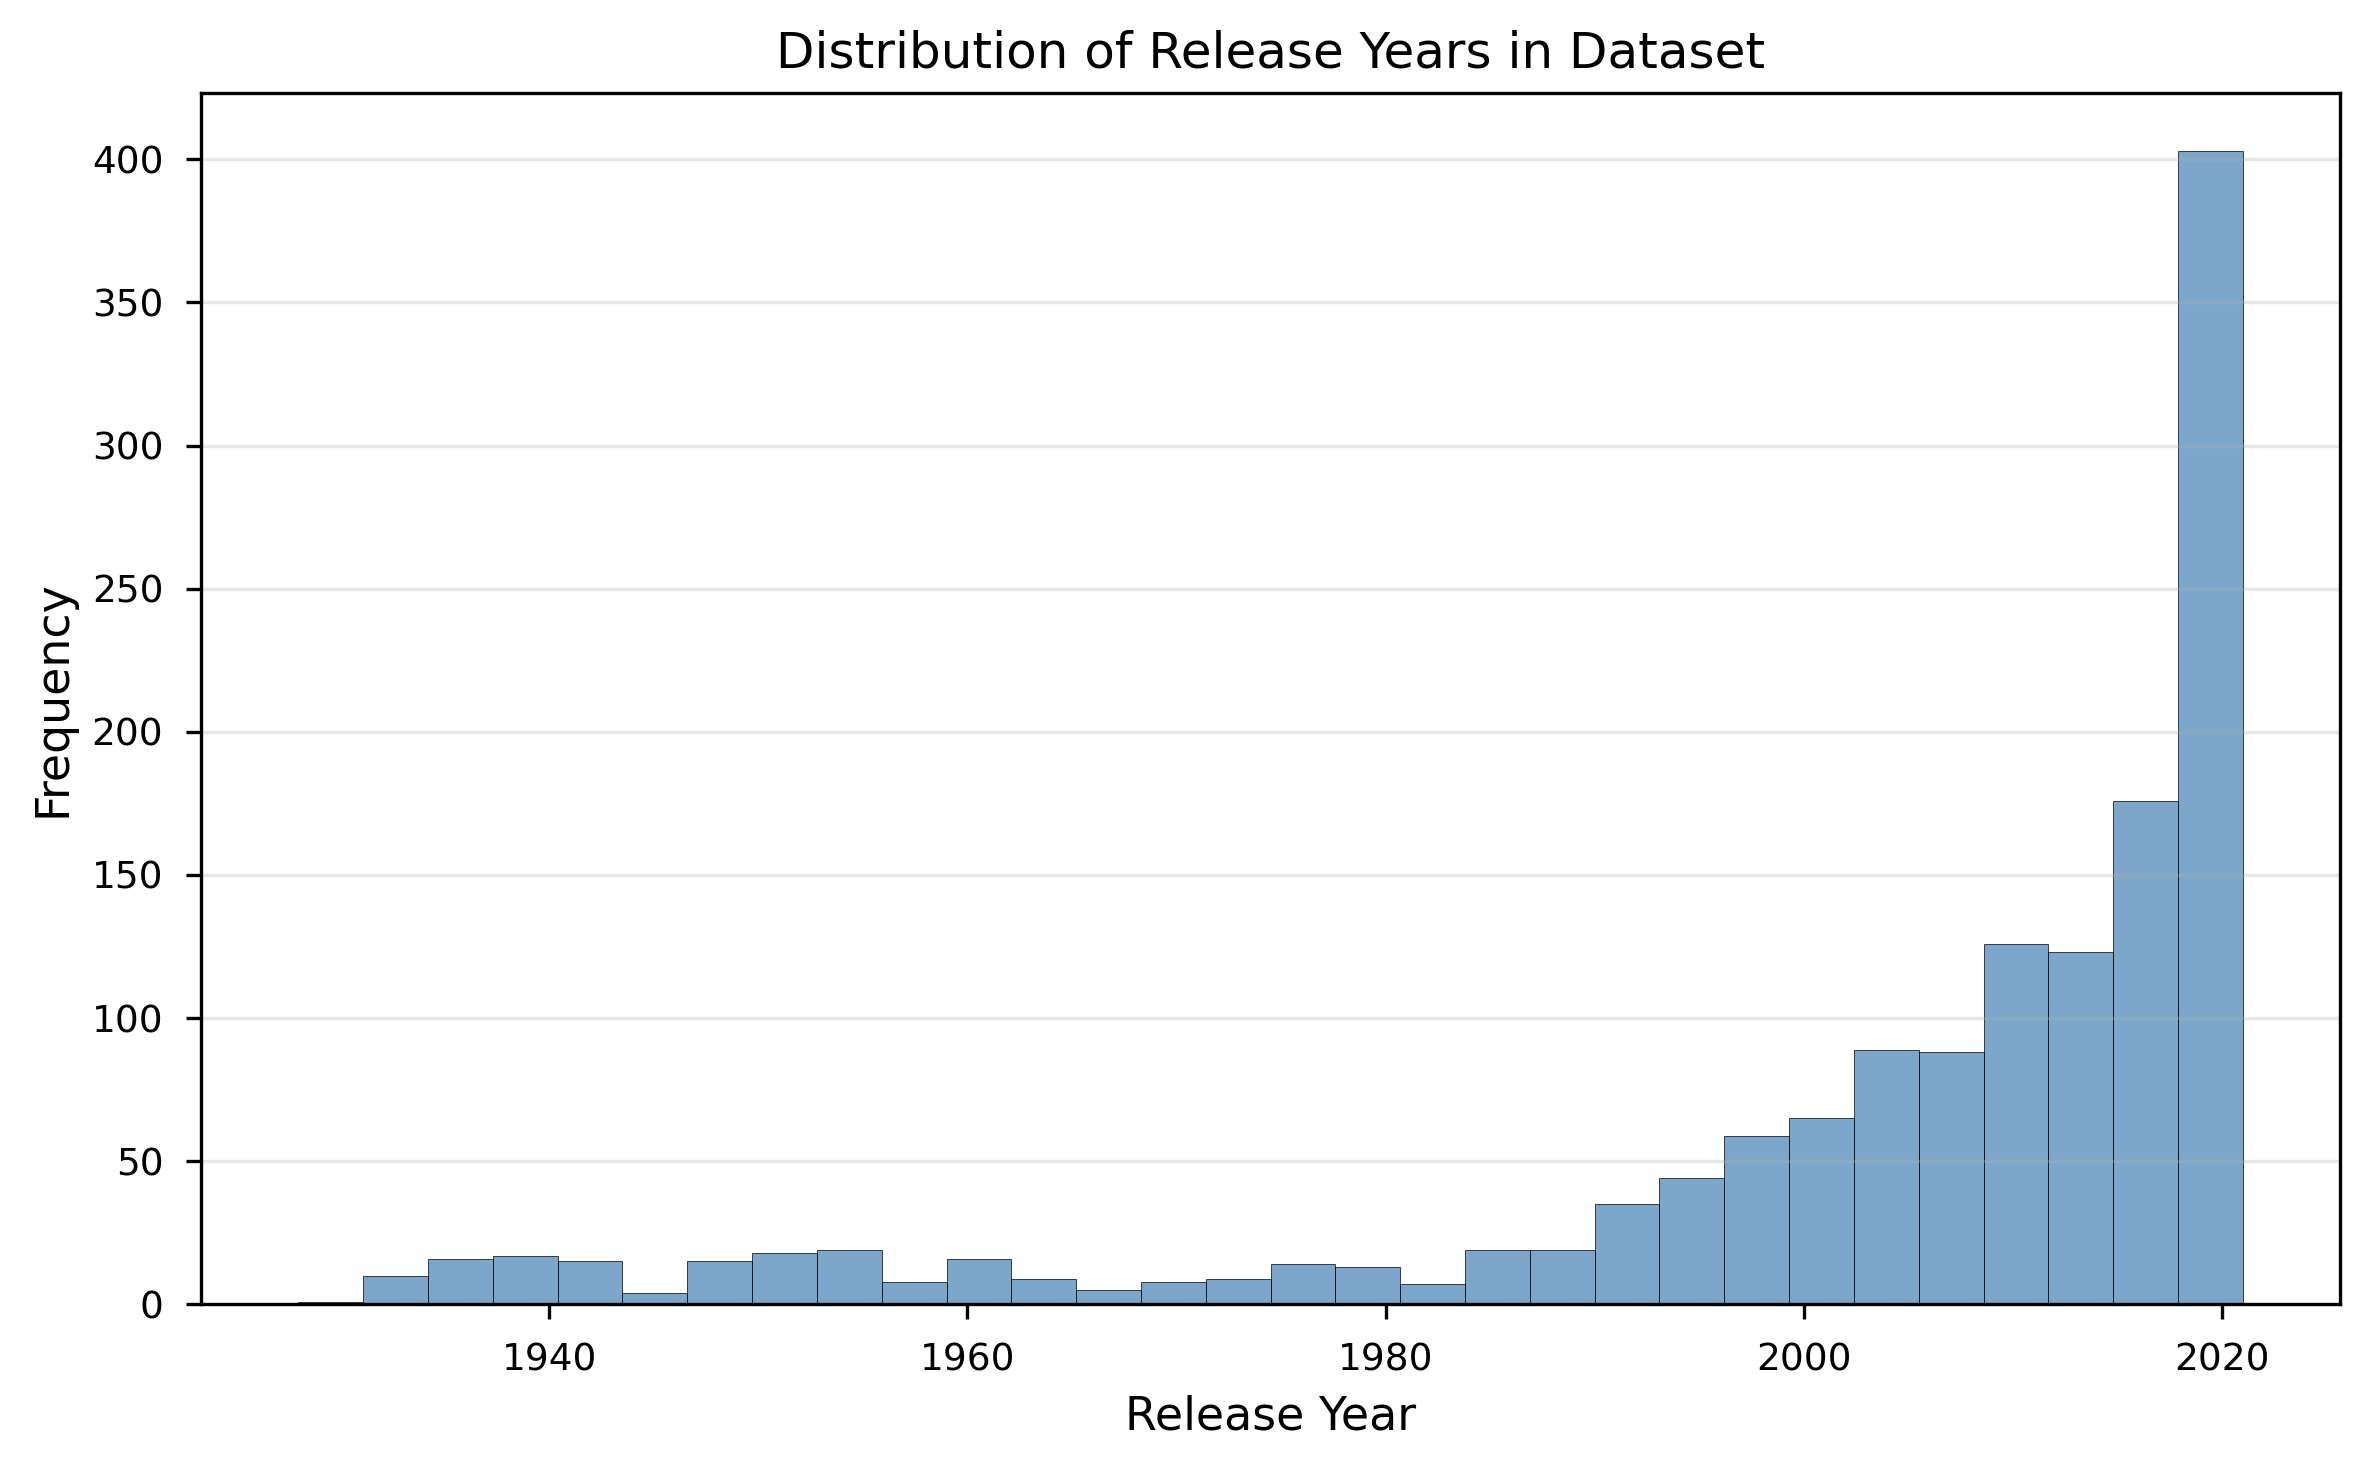

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(df['release_year'], bins=30, edgecolor='black', color='steelblue', alpha=0.7)
ax.set_xlabel('Release Year')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Release Years in Dataset')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

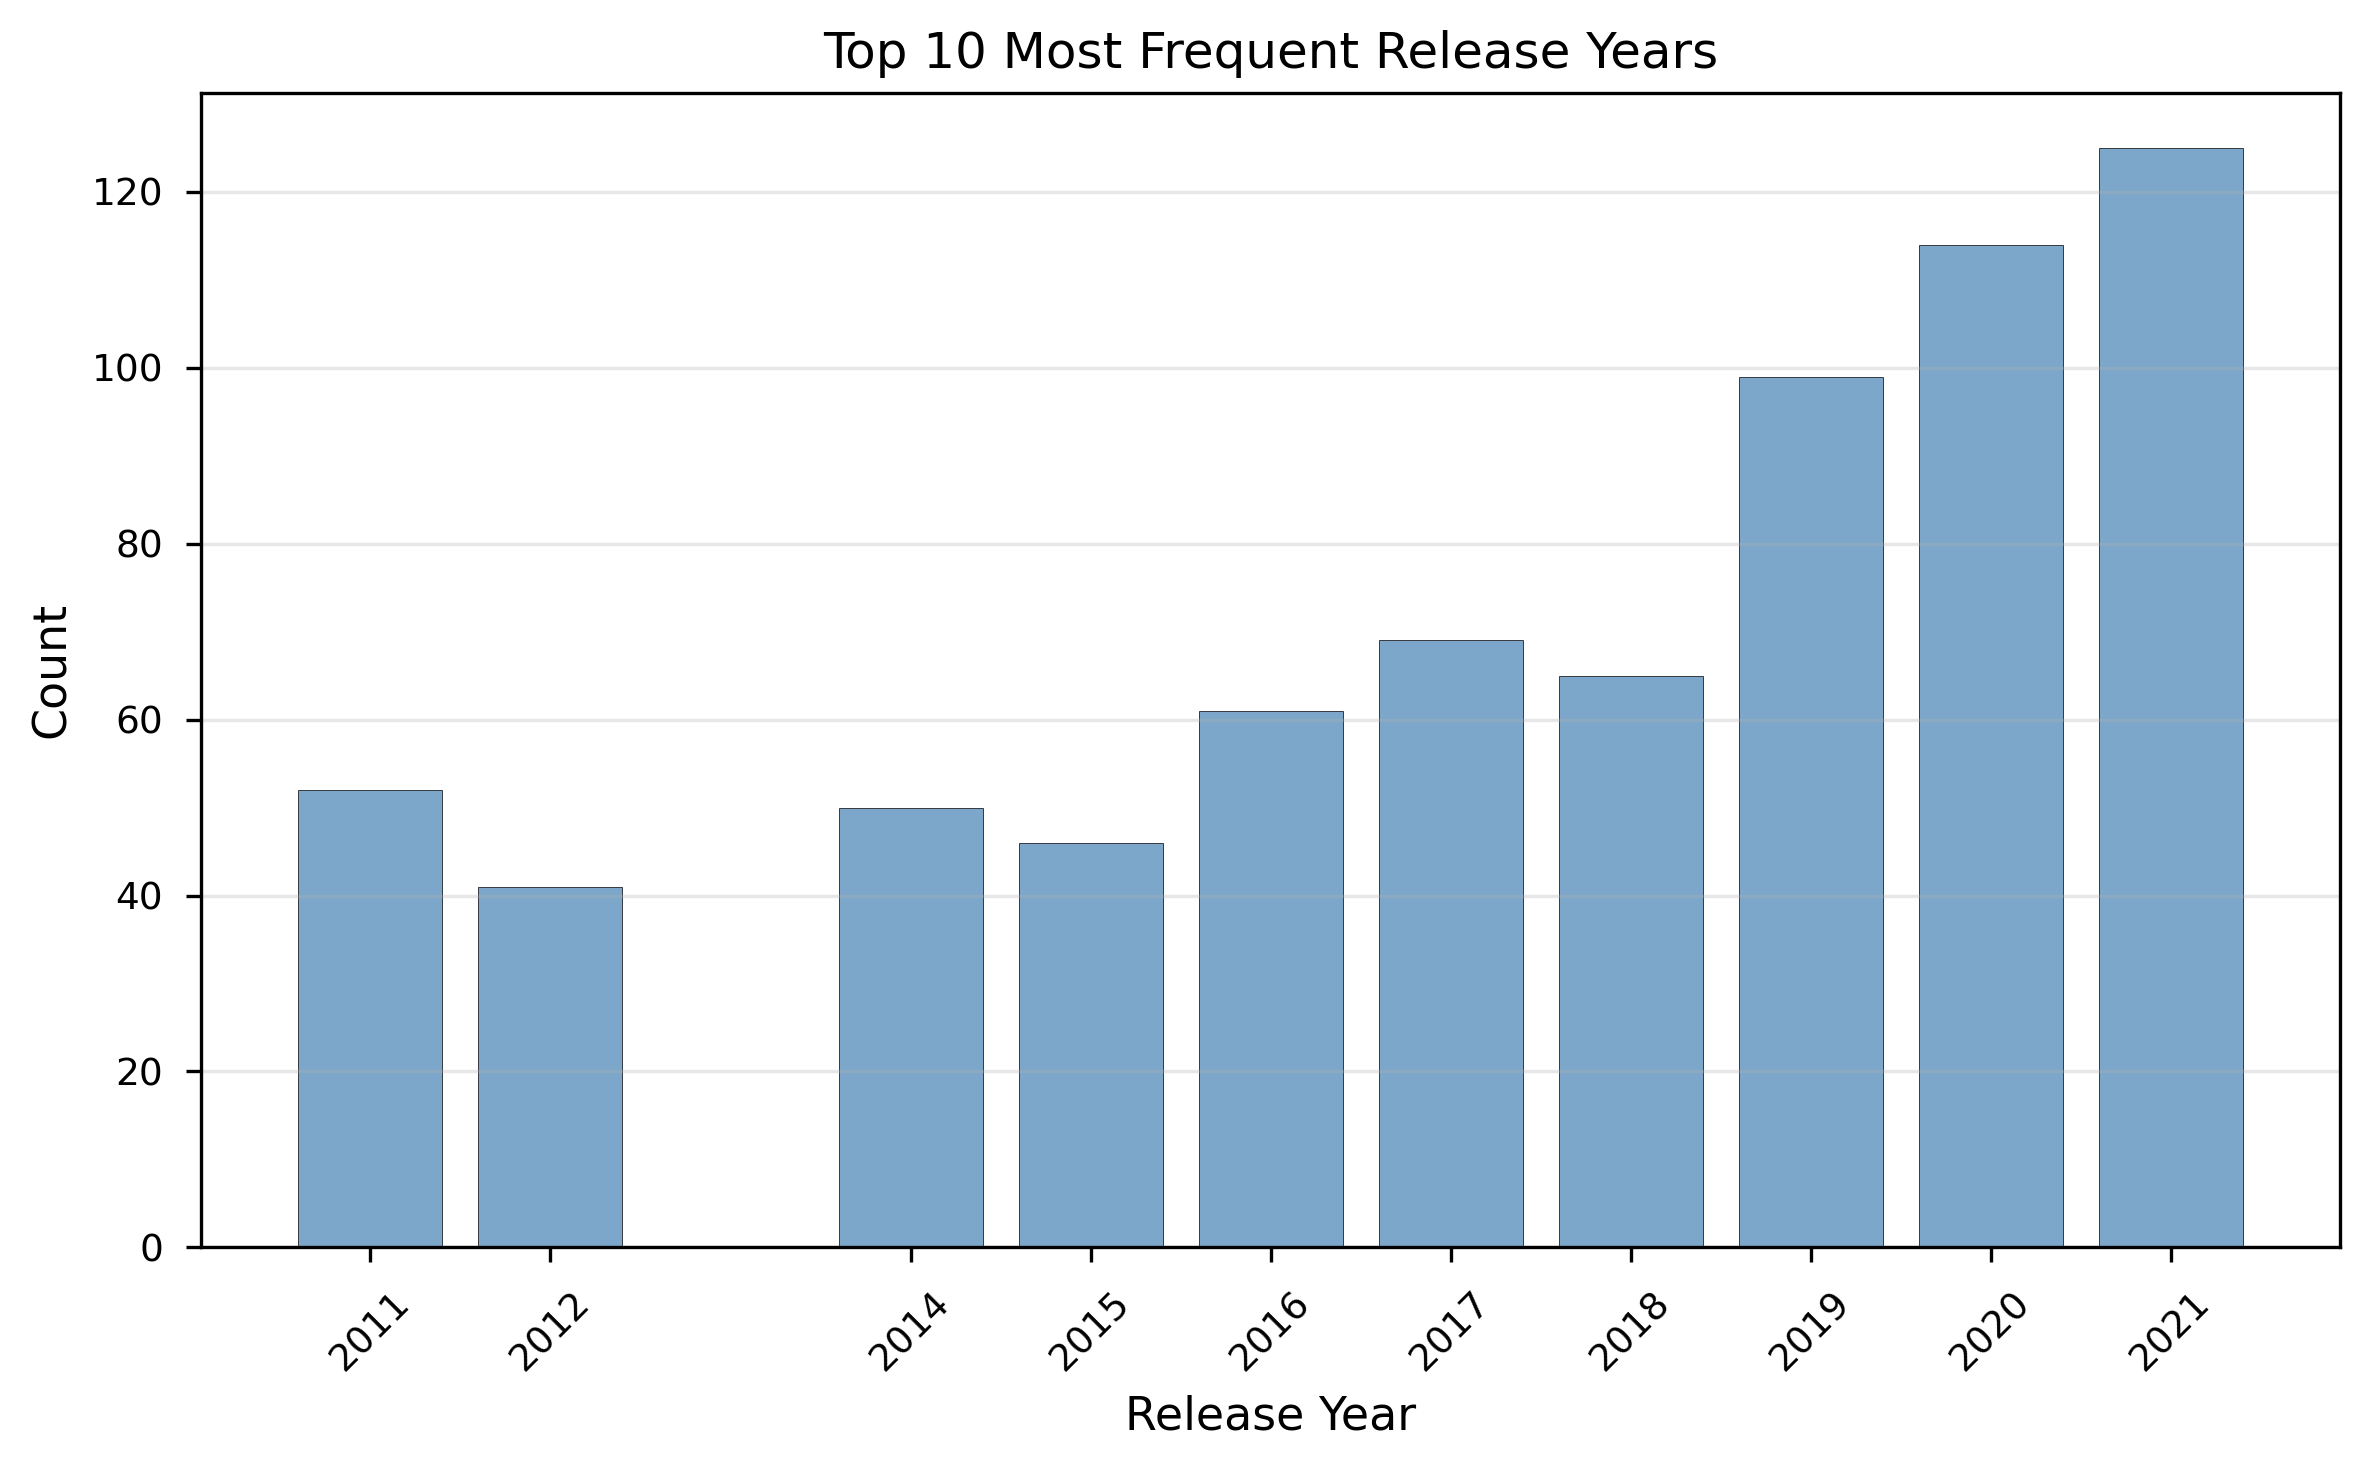

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))

year_counts = Counter(df['release_year'])
top_10_years = sorted(year_counts.items(), key=lambda x: x[1], reverse=True)[:10]
years, counts = zip(*top_10_years)

ax.bar(years, counts, edgecolor='black', color='steelblue', alpha=0.7)
ax.set_xlabel('Release Year')
ax.set_ylabel('Count')
ax.set_title('Top 10 Most Frequent Release Years')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 1.5. Memory Growth: Exact Counting O(|U|) Complexity

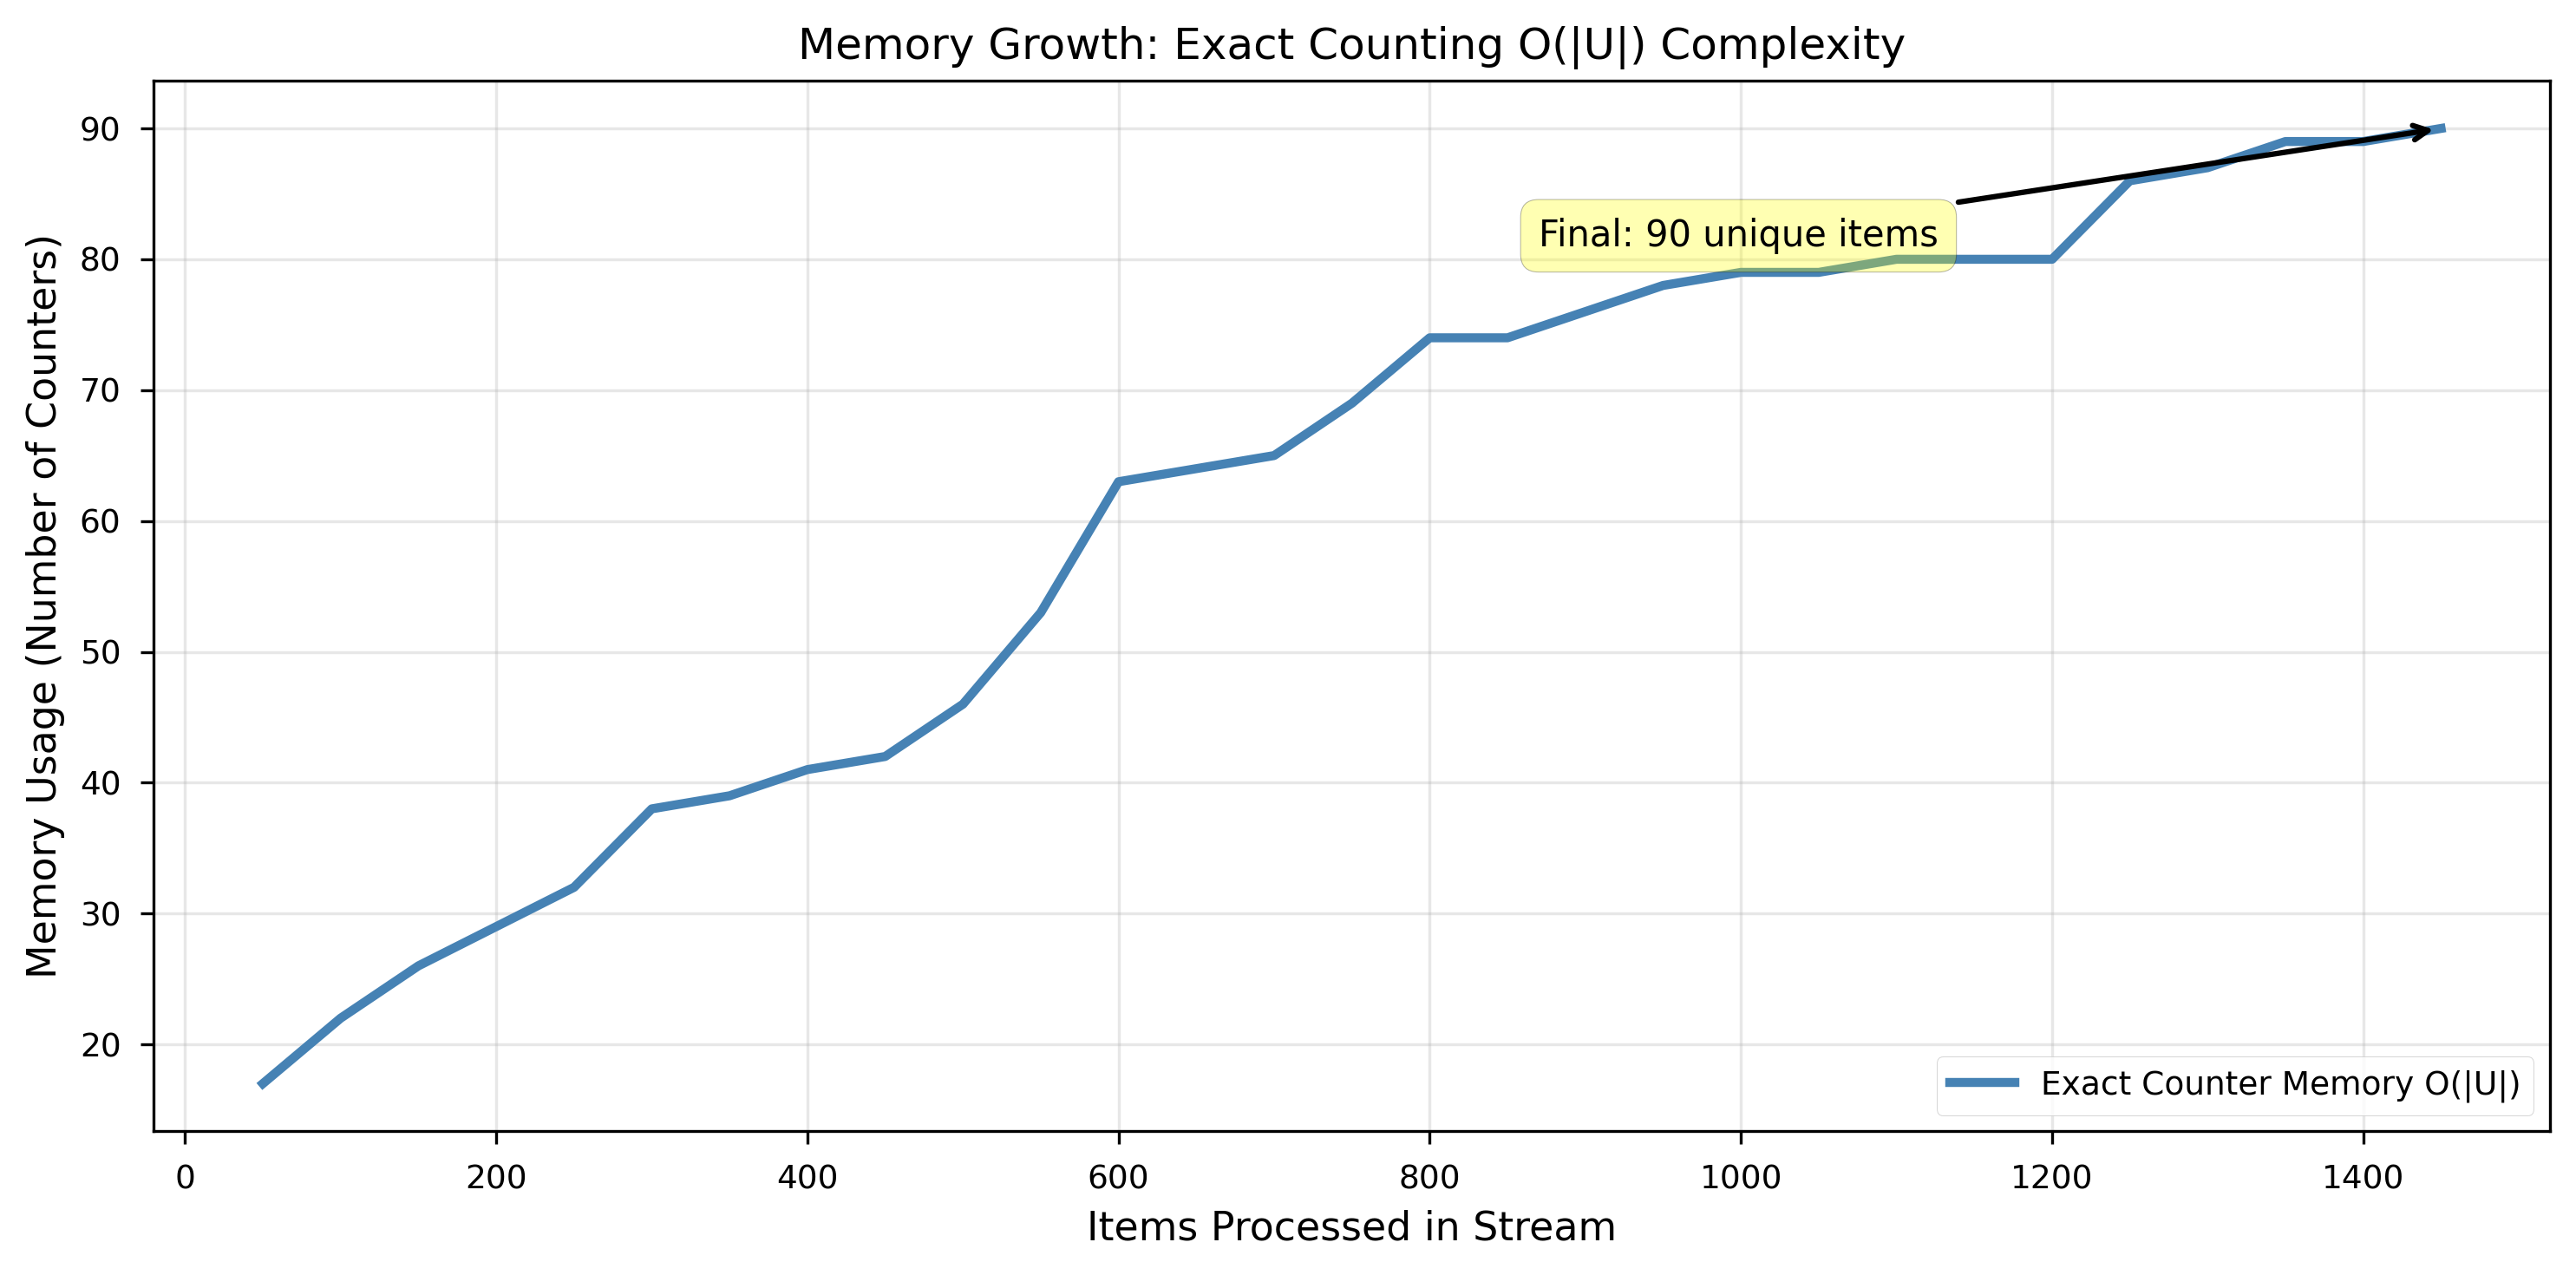

In [32]:
stream = df['release_year'].tolist()
unique_items_over_time = []
items_processed = []
seen = set()

for i, item in enumerate(stream, 1):
    seen.add(item)
    if i % 50 == 0 or i == len(stream):
        items_processed.append(i)
        unique_items_over_time.append(len(seen))

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(items_processed, unique_items_over_time, 
        linewidth=2.5, color='steelblue', label='Exact Counter Memory O(|U|)')

ax.set_xlabel('Items Processed in Stream')
ax.set_ylabel('Memory Usage (Number of Counters)')
ax.set_title('Memory Growth: Exact Counting O(|U|) Complexity')
ax.legend(loc='lower right')
ax.grid(alpha=0.3)

ax.annotate(f'Final: {len(seen)} unique items', 
            xy=(len(stream), len(seen)), 
            xytext=(len(stream)*0.6, len(seen)*0.9),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()


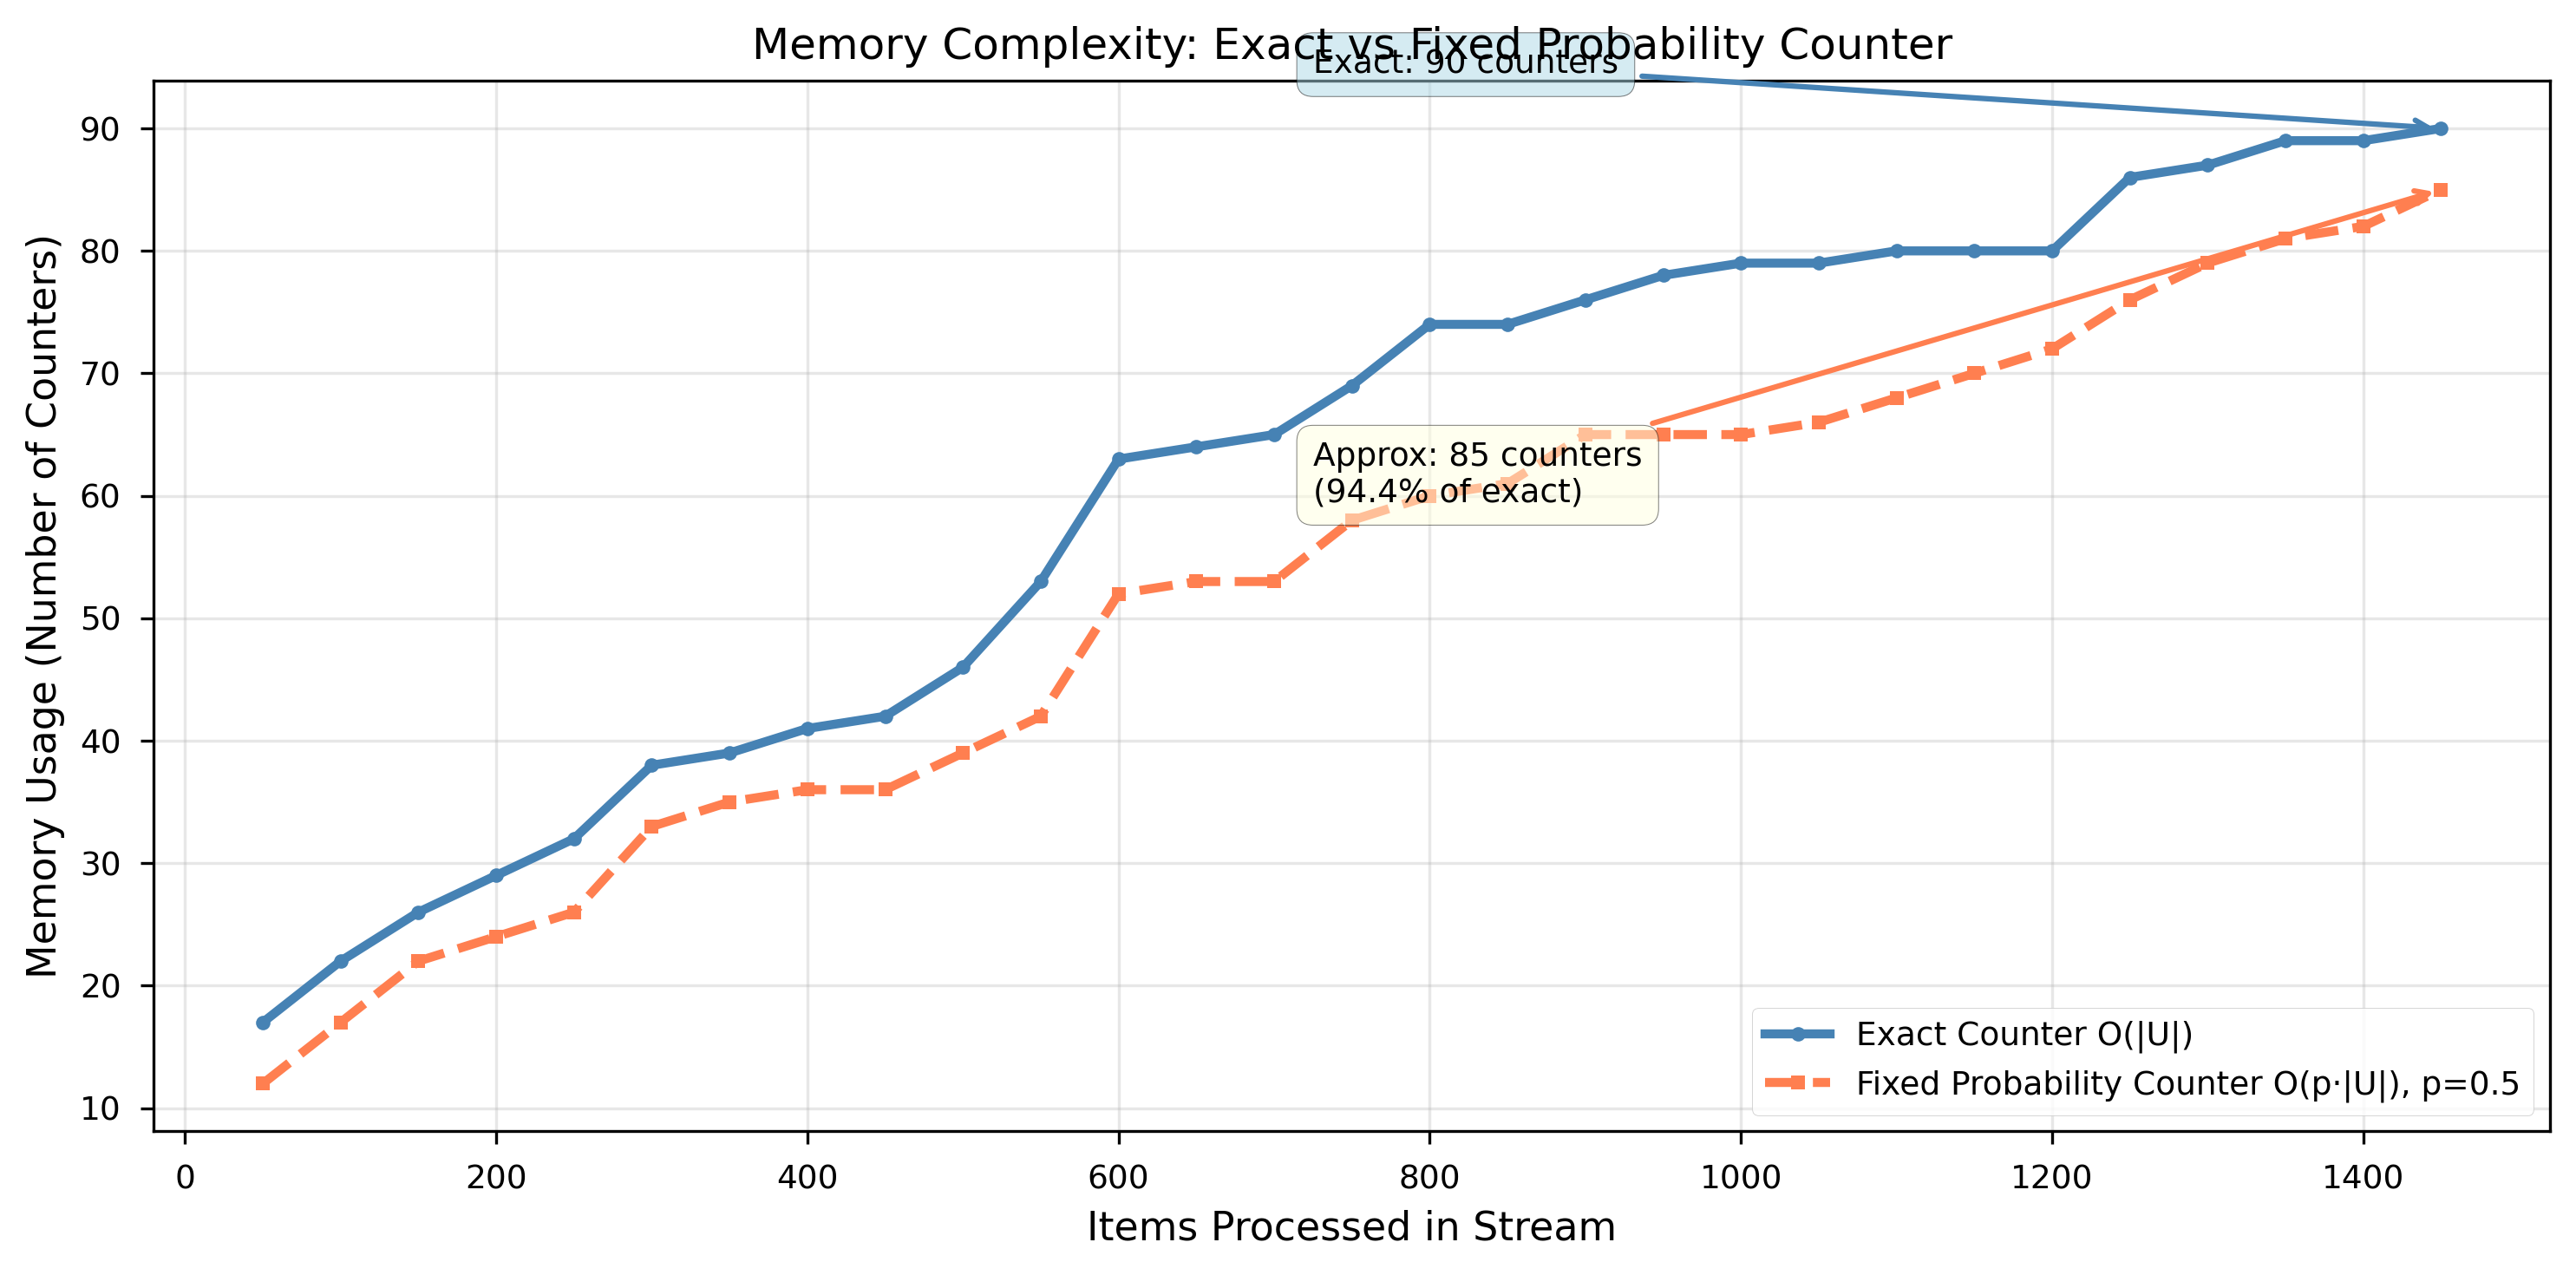

Memory Usage Comparison:
  Exact Counter: 90 counters (100% of |U|)
  Fixed Probability Counter (p=0.5): 85 counters (94.4% of |U|)
  Memory Reduction: 5.6%


In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(memory_growth['items_processed'], memory_growth['exact_counters'], 
        linewidth=2.5, color='steelblue', label='Exact Counter O(|U|)', marker='o', markersize=4)

ax.plot(memory_growth['items_processed'], memory_growth['approx_counters'], 
        linewidth=2.5, color='coral', label='Fixed Probability Counter O(p·|U|), p=0.5', 
        marker='s', markersize=4, linestyle='--')

ax.set_xlabel('Items Processed in Stream')
ax.set_ylabel('Memory Usage (Number of Counters)')
ax.set_title('Memory Complexity: Exact vs Fixed Probability Counter')
ax.legend(loc='lower right')
ax.grid(alpha=0.3)

# Get final values
final_exact = memory_growth['exact_counters'].iloc[-1]
final_approx = memory_growth['approx_counters'].iloc[-1]
final_items = memory_growth['items_processed'].iloc[-1]

# Annotations
ax.annotate(f'Exact: {final_exact} counters', 
            xy=(final_items, final_exact), 
            xytext=(final_items*0.5, final_exact*1.05),
            arrowprops=dict(arrowstyle='->', color='steelblue', lw=1.5),
            fontsize=9, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.5))

ax.annotate(f'Approx: {final_approx} counters\n({final_approx/final_exact*100:.1f}% of exact)', 
            xy=(final_items, final_approx), 
            xytext=(final_items*0.5, final_approx*0.7),
            arrowprops=dict(arrowstyle='->', color='coral', lw=1.5),
            fontsize=9, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"Memory Usage Comparison:")
print(f"  Exact Counter: {final_exact} counters (100% of |U|)")
print(f"  Fixed Probability Counter (p=0.5): {final_approx} counters ({final_approx/final_exact*100:.1f}% of |U|)")
print(f"  Memory Reduction: {(1 - final_approx/final_exact)*100:.1f}%")

## 1.6. Trade-off: Memory vs Stability (Sampling Probability p)

In [ ]:
# Use empirical data from probability_tradeoff.csv
p_values = prob_tradeoff['probability_p']
memory_usage = prob_tradeoff['memory_percentage']
mean_abs_error = prob_tradeoff['mean_abs_error']
std_abs_error = prob_tradeoff['std_abs_error']

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot memory usage on left y-axis
color_memory = 'steelblue'
ax1.set_xlabel('Sampling Probability (p)')
ax1.set_ylabel('Memory Usage (% of Exact)', color=color_memory)
line1 = ax1.plot(p_values, memory_usage, linewidth=2.5, color=color_memory, 
                  label='Memory Usage', marker='o', markersize=6)
ax1.tick_params(axis='y', labelcolor=color_memory)
ax1.grid(alpha=0.3)
ax1.set_xlim(0, 1.05)
ax1.set_ylim(0, 110)

# Create second y-axis for absolute error (stability metric)
ax2 = ax1.twinx()
color_stability = 'coral'
ax2.set_ylabel('Mean Absolute Error', color=color_stability)
line2 = ax2.plot(p_values, mean_abs_error, linewidth=2.5, color=color_stability, 
                  linestyle='--', label='Mean Abs Error', marker='s', markersize=6)
ax2.tick_params(axis='y', labelcolor=color_stability)

# Add error bars for stability
ax2.fill_between(p_values, 
                  mean_abs_error - std_abs_error, 
                  mean_abs_error + std_abs_error, 
                  color=color_stability, alpha=0.2, label='±1 Std Dev')

# Add title
ax1.set_title('Empirical Trade-off: Memory Usage vs Estimation Accuracy')

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# Add annotations for key trade-off points
ax1.annotate('p=1.0: Exact\n100% memory\n0 error', 
             xy=(1.0, 100), xytext=(0.75, 80),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
             fontsize=9, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.5))

ax1.annotate('p=0.5: Balanced\n92% memory\n2.8 avg error', 
             xy=(0.5, prob_tradeoff[prob_tradeoff['probability_p']==0.5]['memory_percentage'].values[0]), 
             xytext=(0.3, 70),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
             fontsize=9, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.5))

ax1.annotate('p=0.1: Low memory\n51% memory\n8.2 avg error', 
             xy=(0.1, prob_tradeoff[prob_tradeoff['probability_p']==0.1]['memory_percentage'].values[0]), 
             xytext=(0.1, 20),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
             fontsize=9, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"Empirical Trade-off Analysis (Fixed Probability Counter):")
print(f"{'p':>5} | {'Memory %':>9} | {'Avg Error':>10} | {'Missing Items %':>15}")
print("-" * 60)
for _, row in prob_tradeoff.iterrows():
    print(f"{row['probability_p']:>5.1f} | {row['memory_percentage']:>8.1f}% | {row['mean_abs_error']:>10.2f} | {row['missing_items_pct']:>14.1f}%")

## 2. Exact vs Approximate Counter

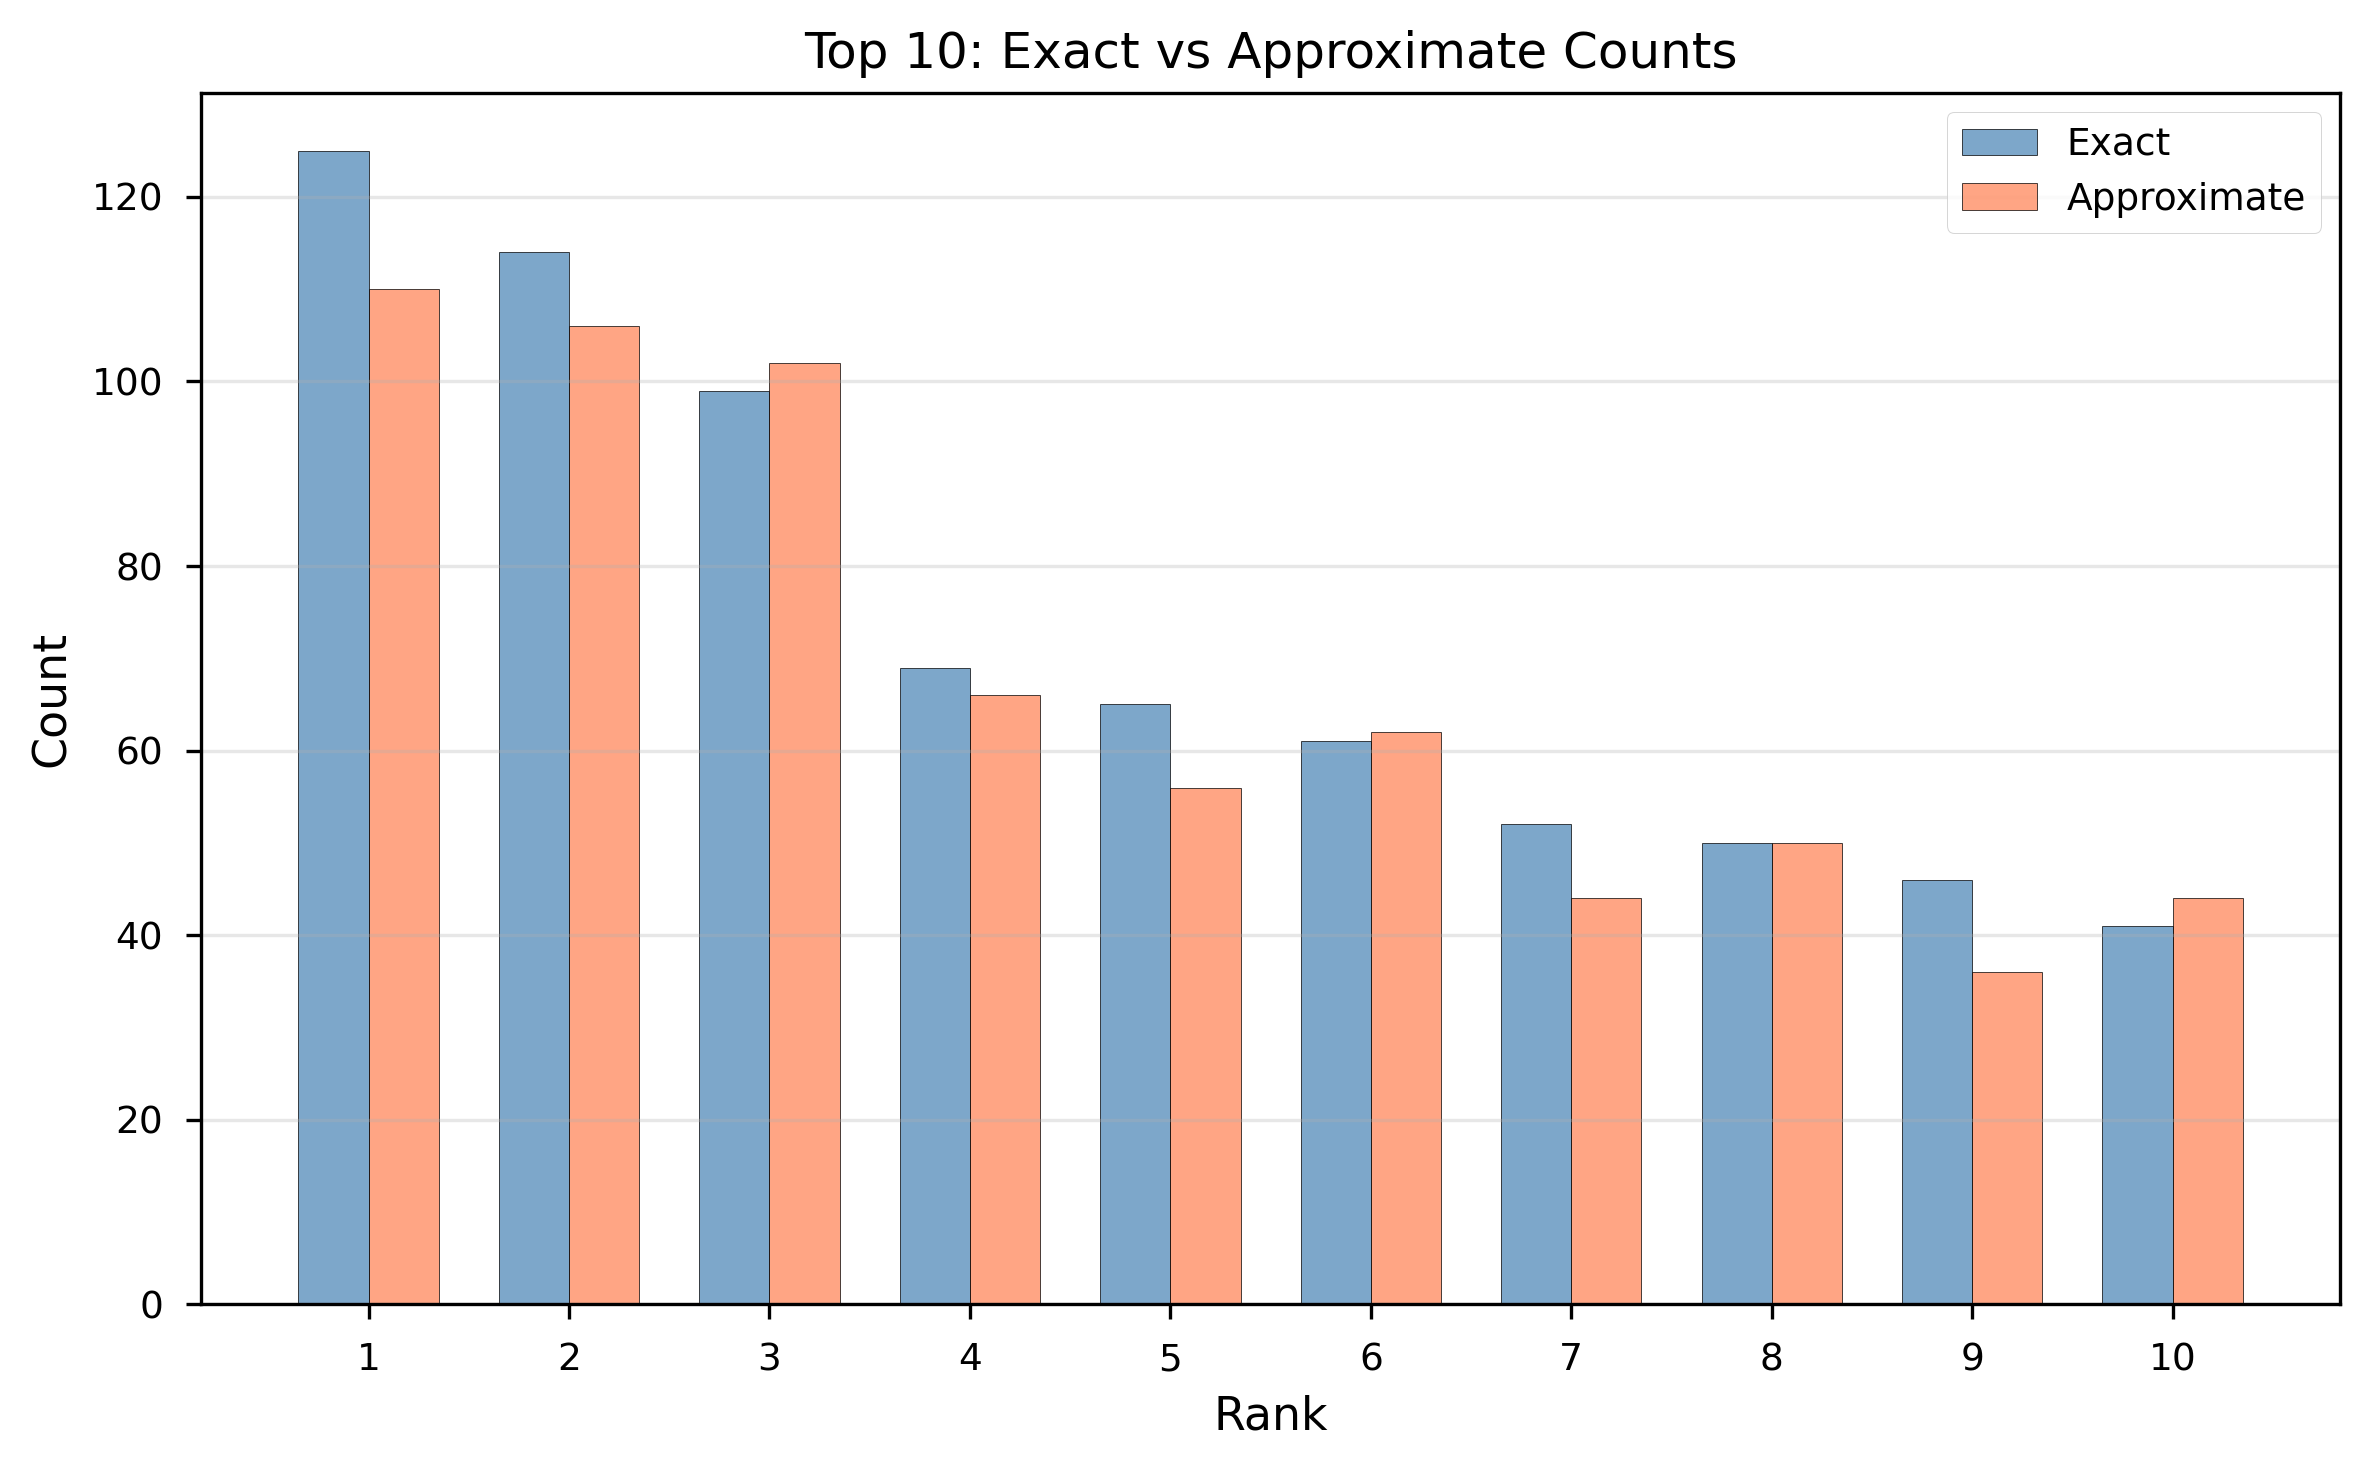

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(approx_top10))
width = 0.35

ax.bar(x - width/2, approx_top10['exact_count'], width, label='Exact', 
       edgecolor='black', color='steelblue', alpha=0.7)
ax.bar(x + width/2, approx_top10['approx_count'], width, label='Approximate', 
       edgecolor='black', color='coral', alpha=0.7)
ax.set_xlabel('Rank')
ax.set_ylabel('Count')
ax.set_title('Top 10: Exact vs Approximate Counts')
ax.set_xticks(x)
ax.set_xticklabels(approx_top10['rank'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

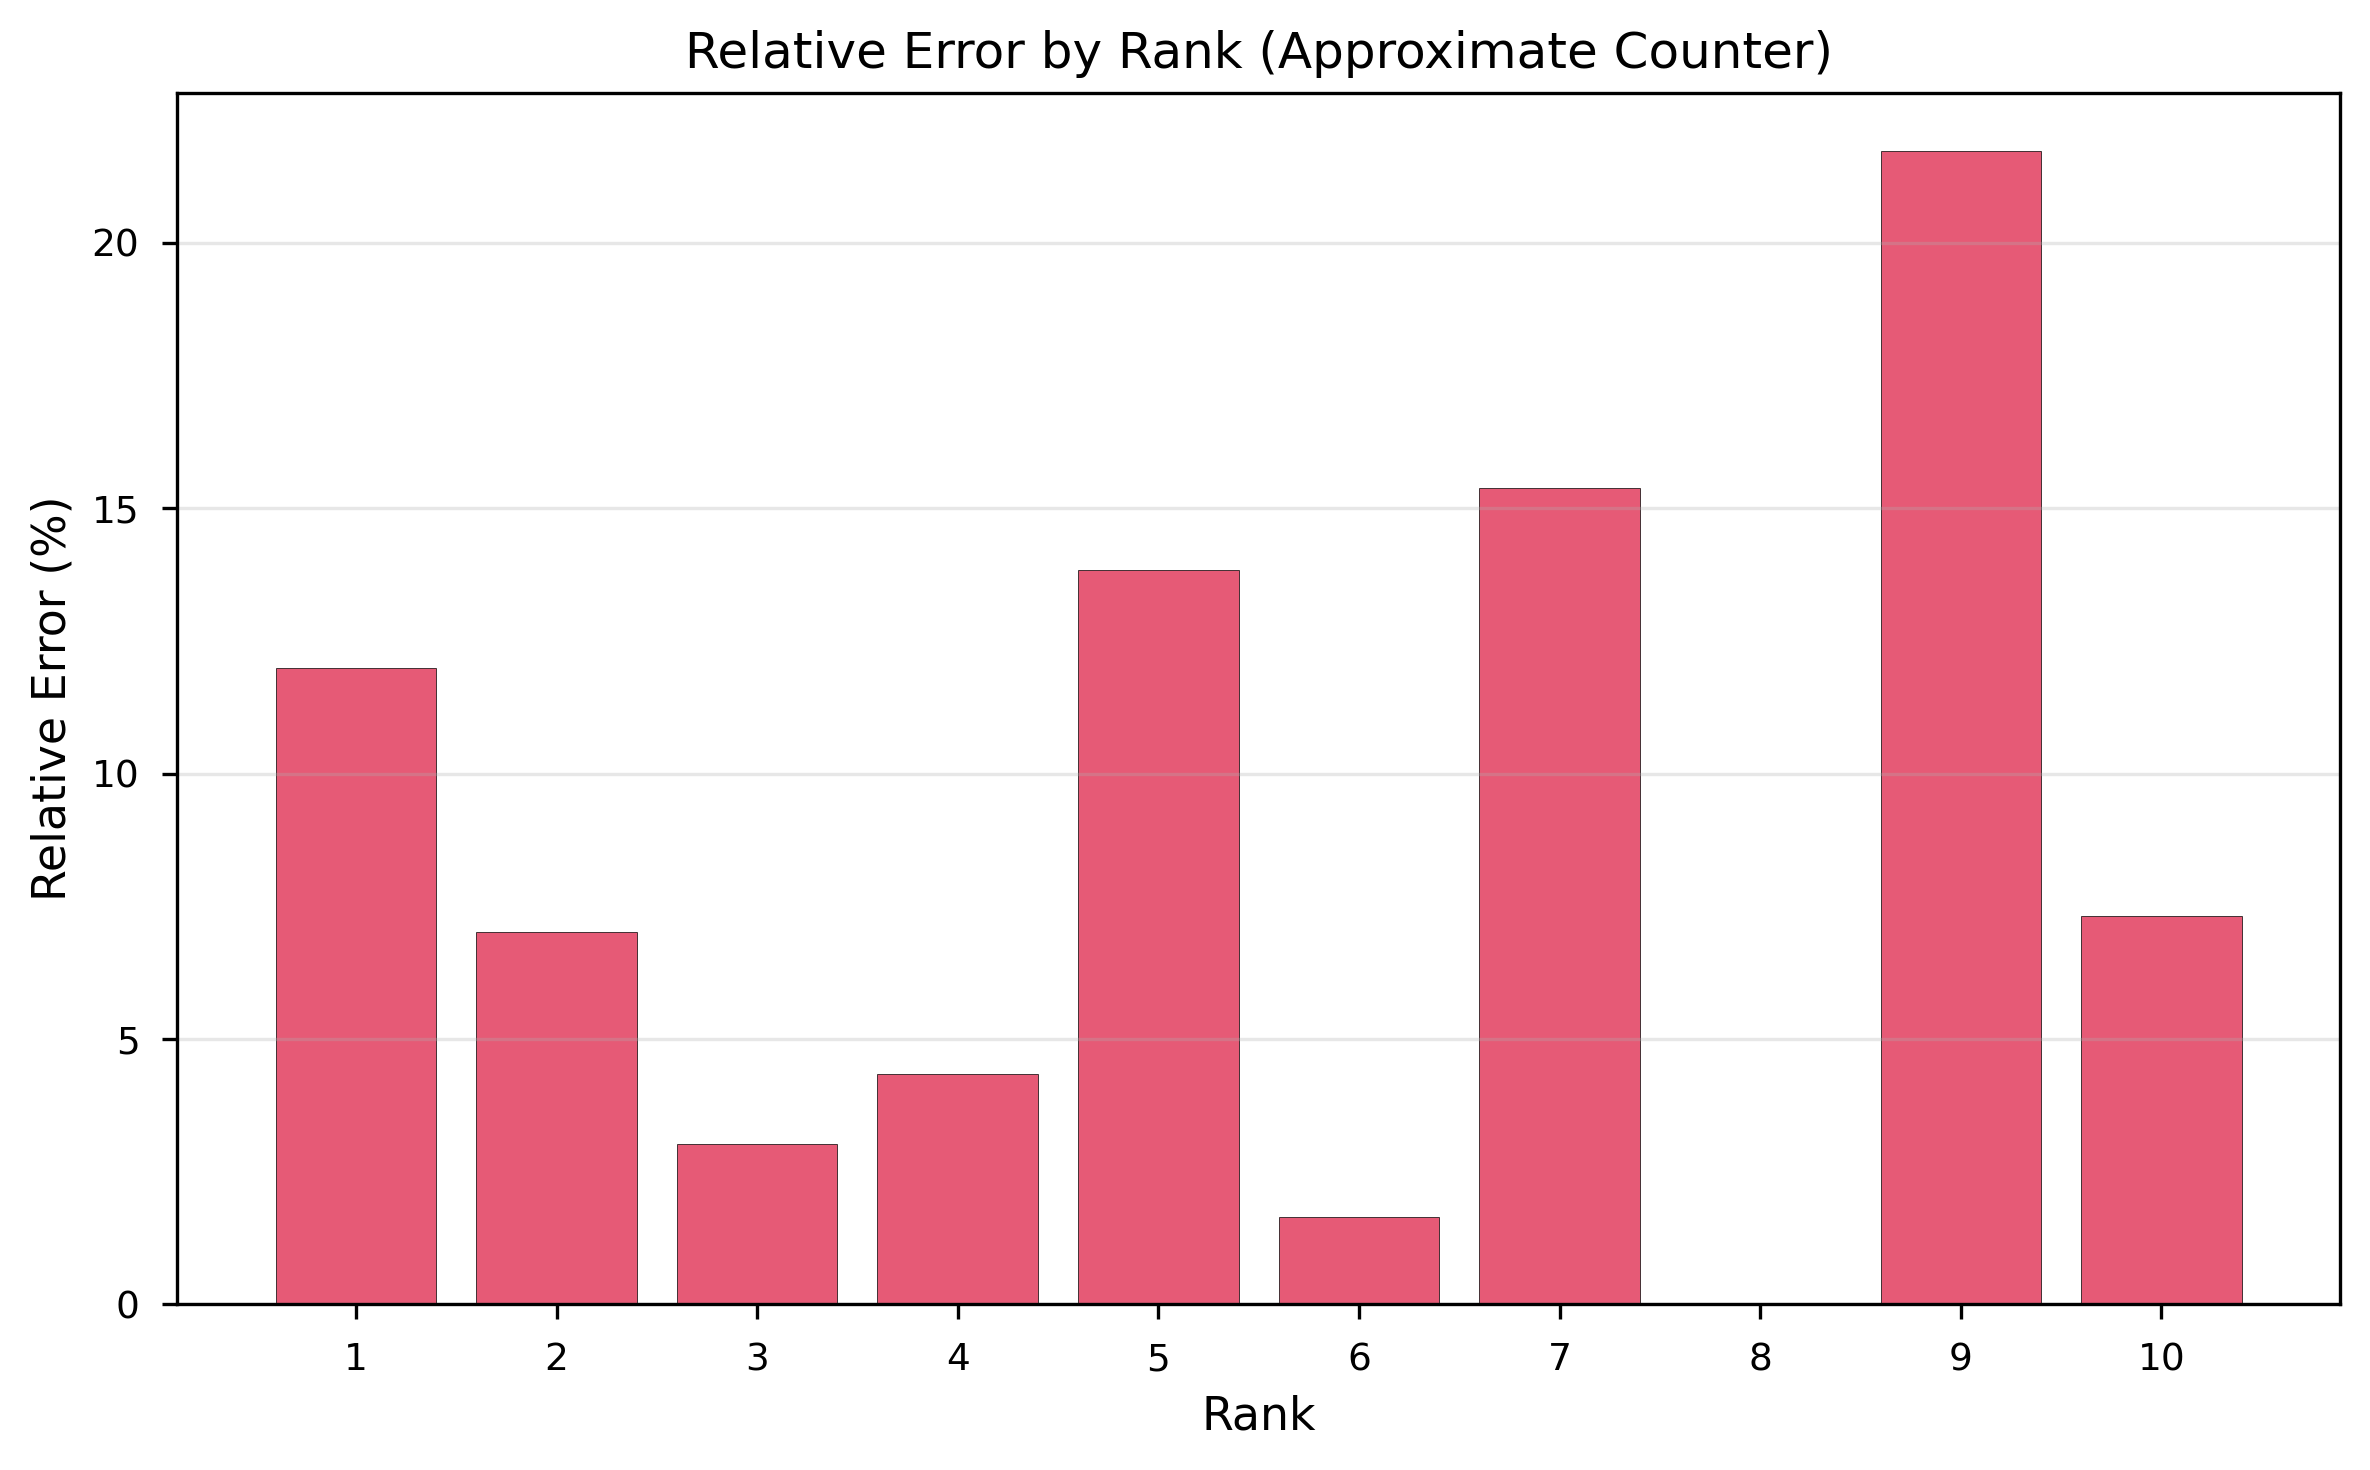

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(approx_top10['rank'], approx_top10['rel_error_pct'], 
       edgecolor='black', color='crimson', alpha=0.7)
ax.set_xlabel('Rank')
ax.set_ylabel('Relative Error (%)')
ax.set_title('Relative Error by Rank (Approximate Counter)')
ax.set_xticks(approx_top10['rank'])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Approximate Counter Error Statistics

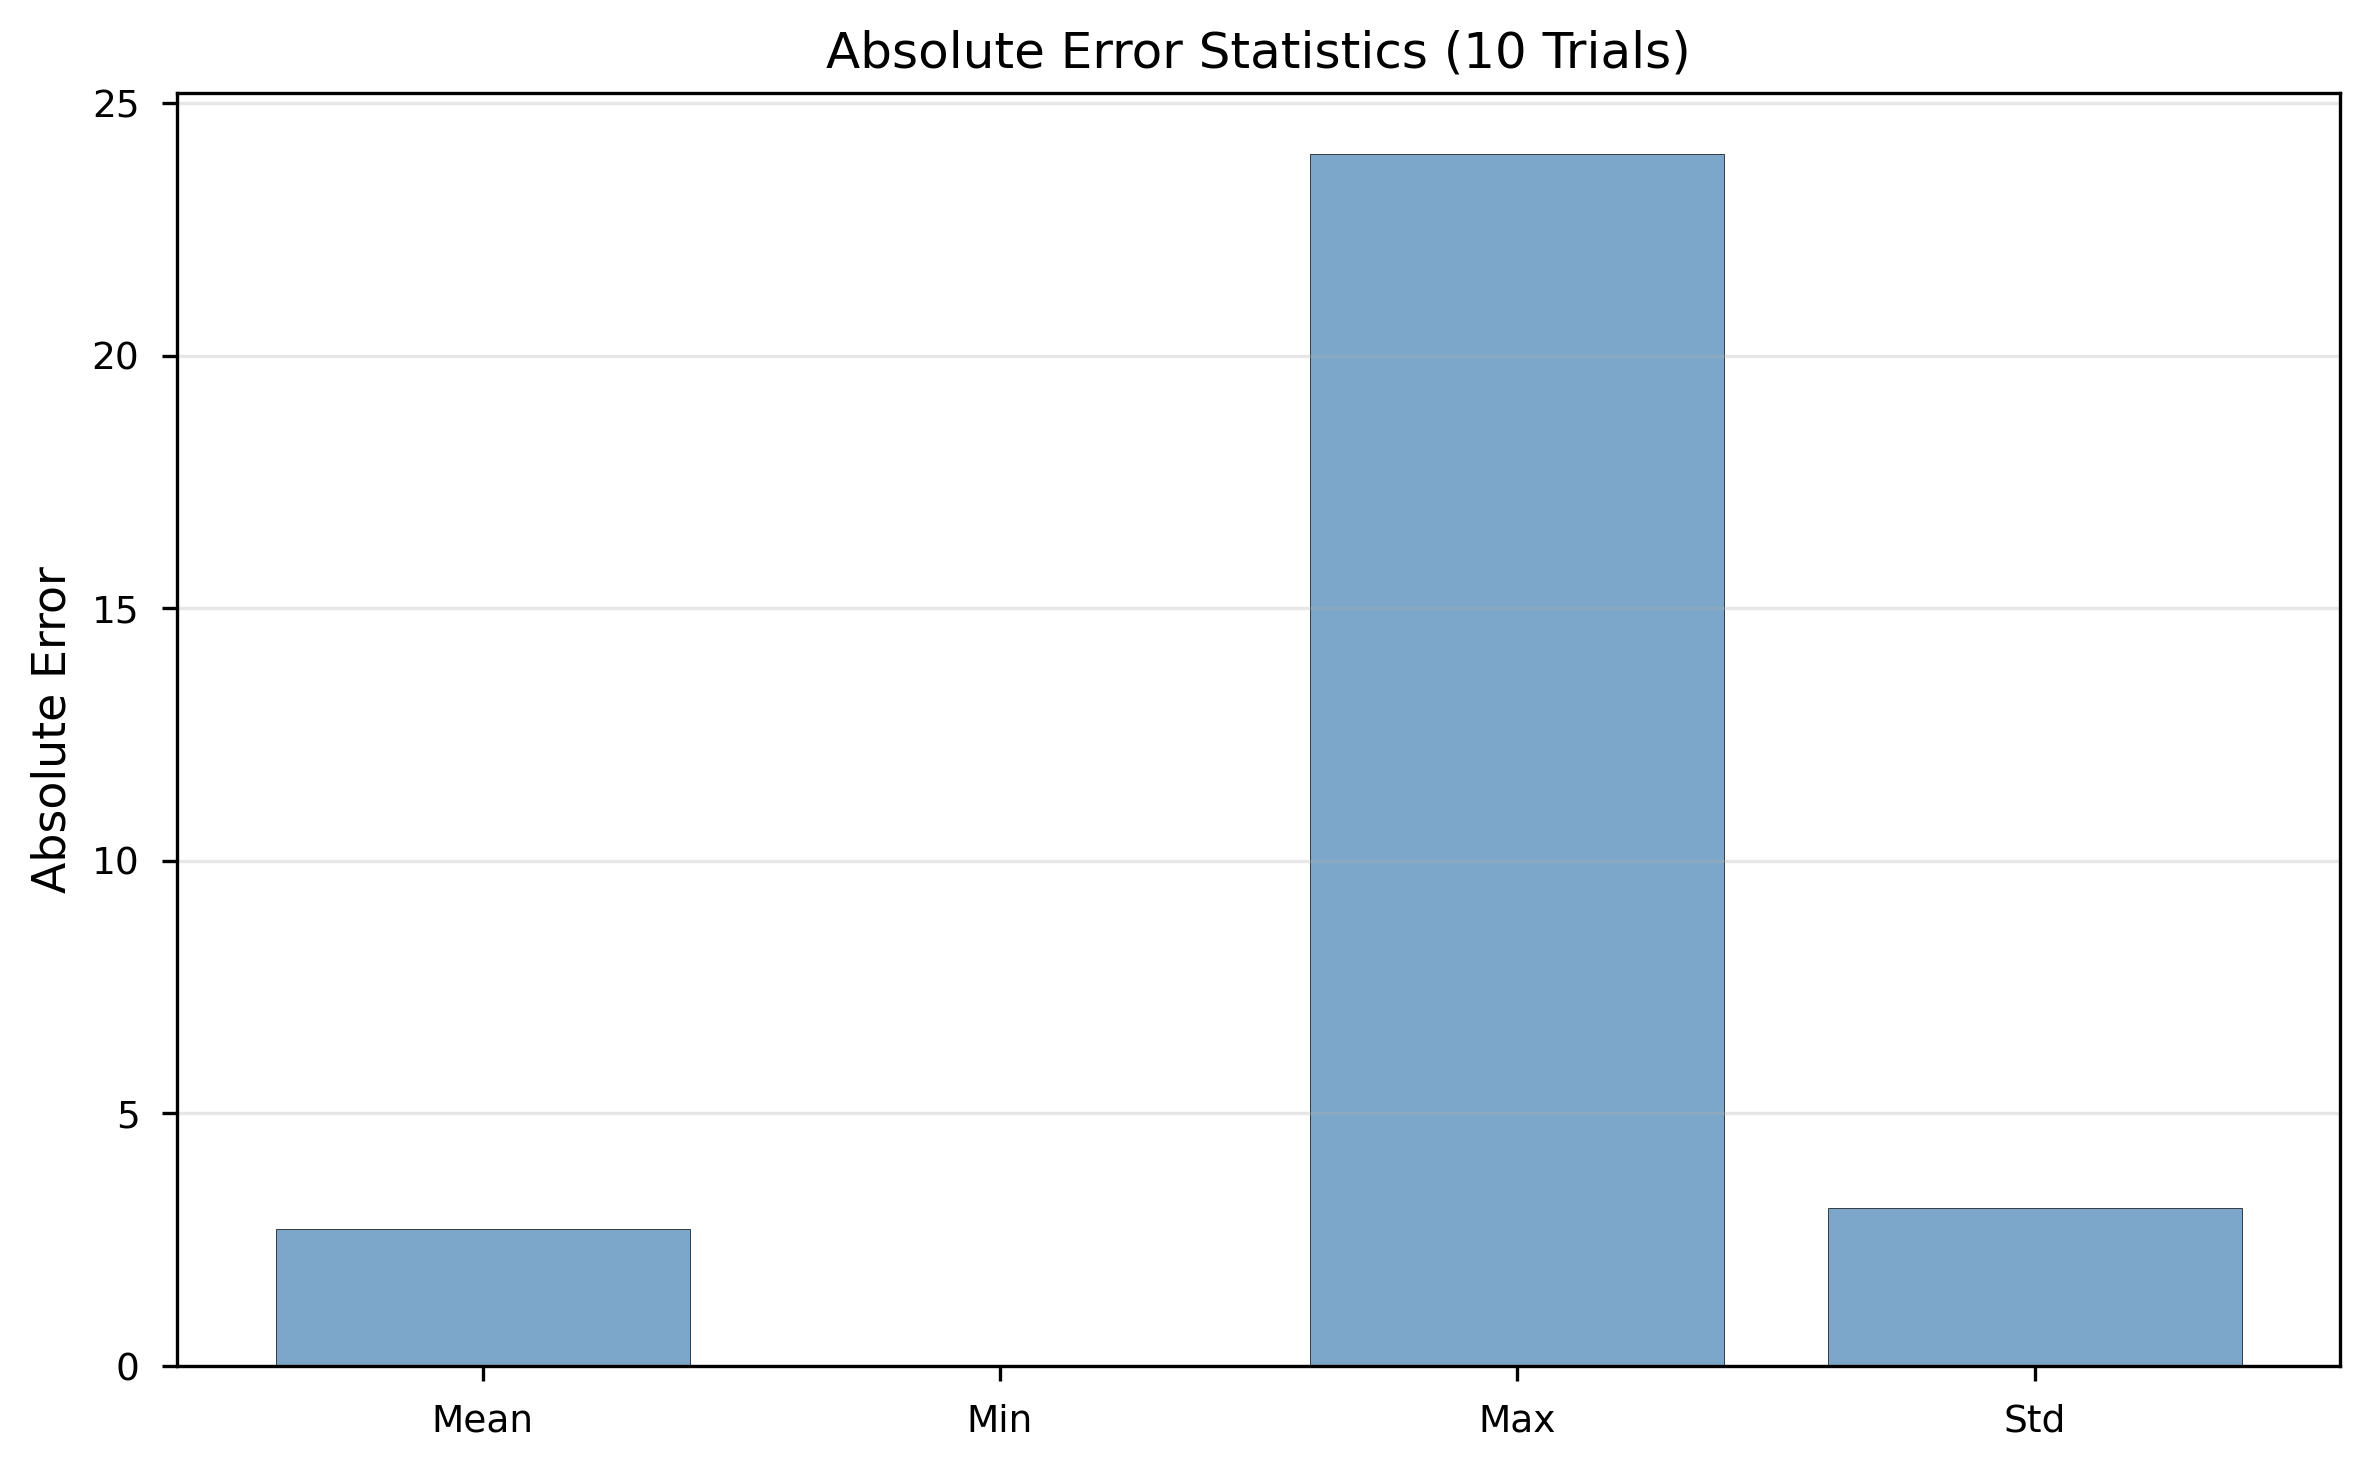

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

abs_metrics = approx_stats[approx_stats['metric'].str.contains('absolute_error')]
metrics_labels = ['Mean', 'Min', 'Max', 'Std']
abs_values = abs_metrics['value'].values

ax.bar(metrics_labels, abs_values, edgecolor='black', color='steelblue', alpha=0.7)
ax.set_ylabel('Absolute Error')
ax.set_title('Absolute Error Statistics (10 Trials)')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

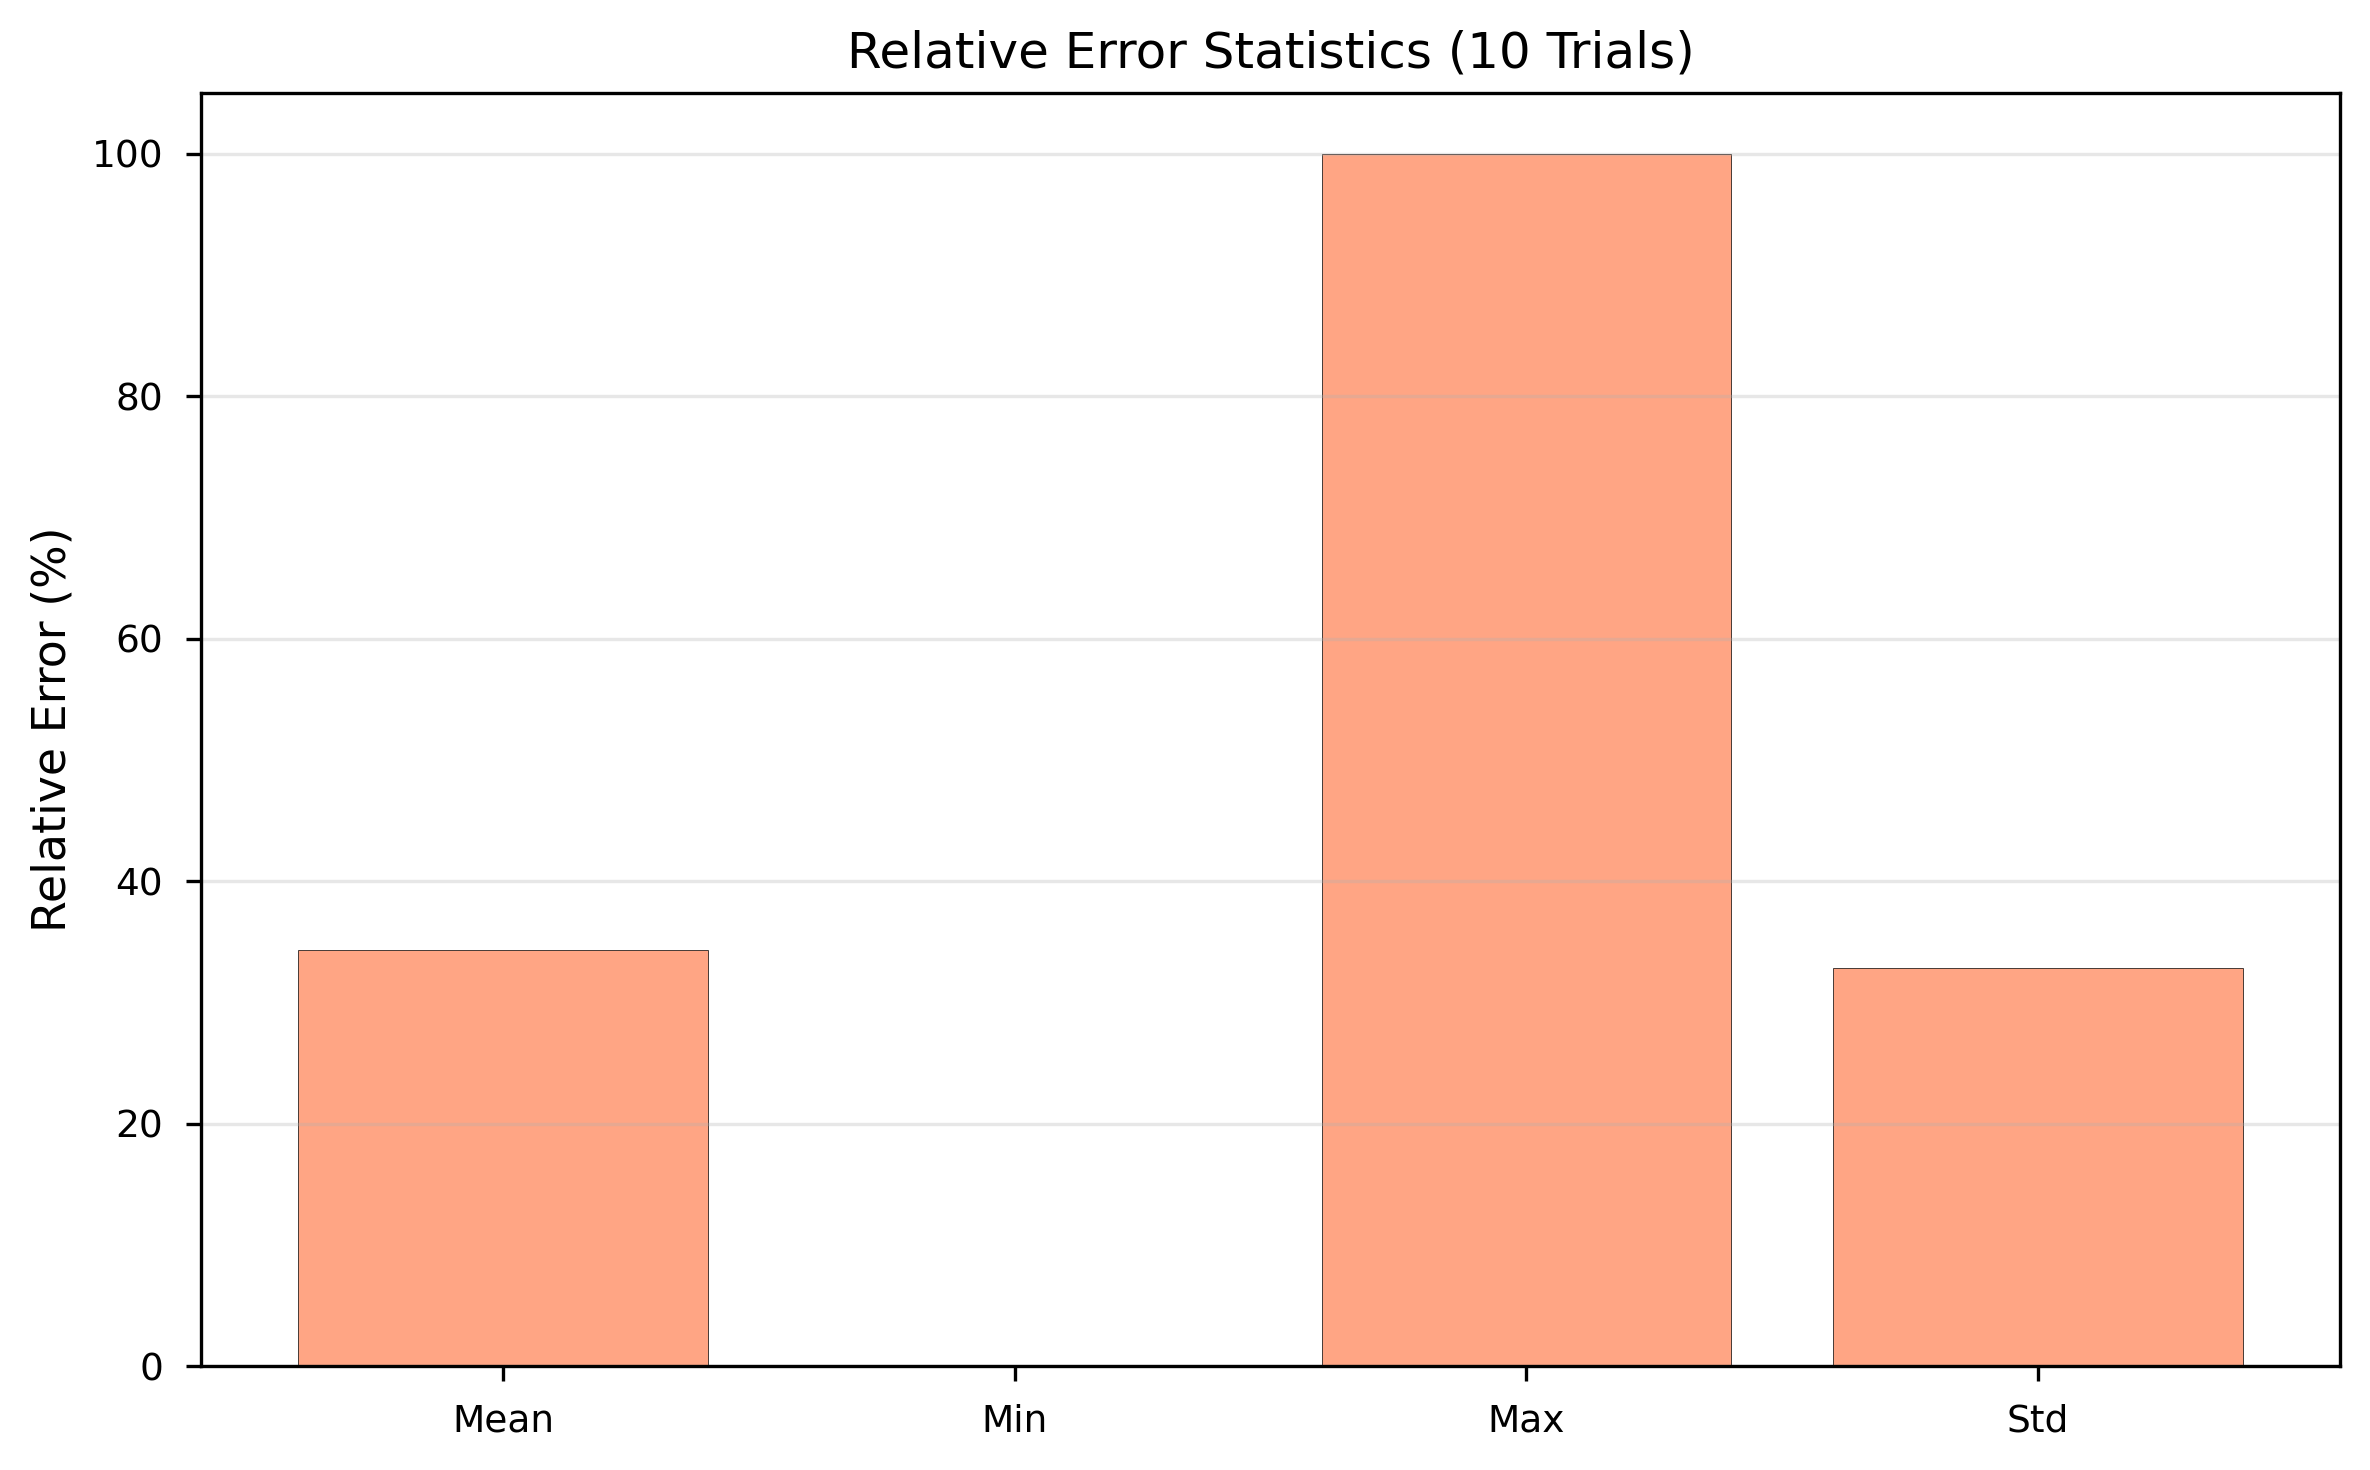

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

rel_metrics = approx_stats[approx_stats['metric'].str.contains('relative_error')]
metrics_labels = ['Mean', 'Min', 'Max', 'Std']
rel_values = rel_metrics['value'].values

ax.bar(metrics_labels, rel_values, edgecolor='black', color='coral', alpha=0.7)
ax.set_ylabel('Relative Error (%)')
ax.set_title('Relative Error Statistics (10 Trials)')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Space-Saving Algorithm Performance

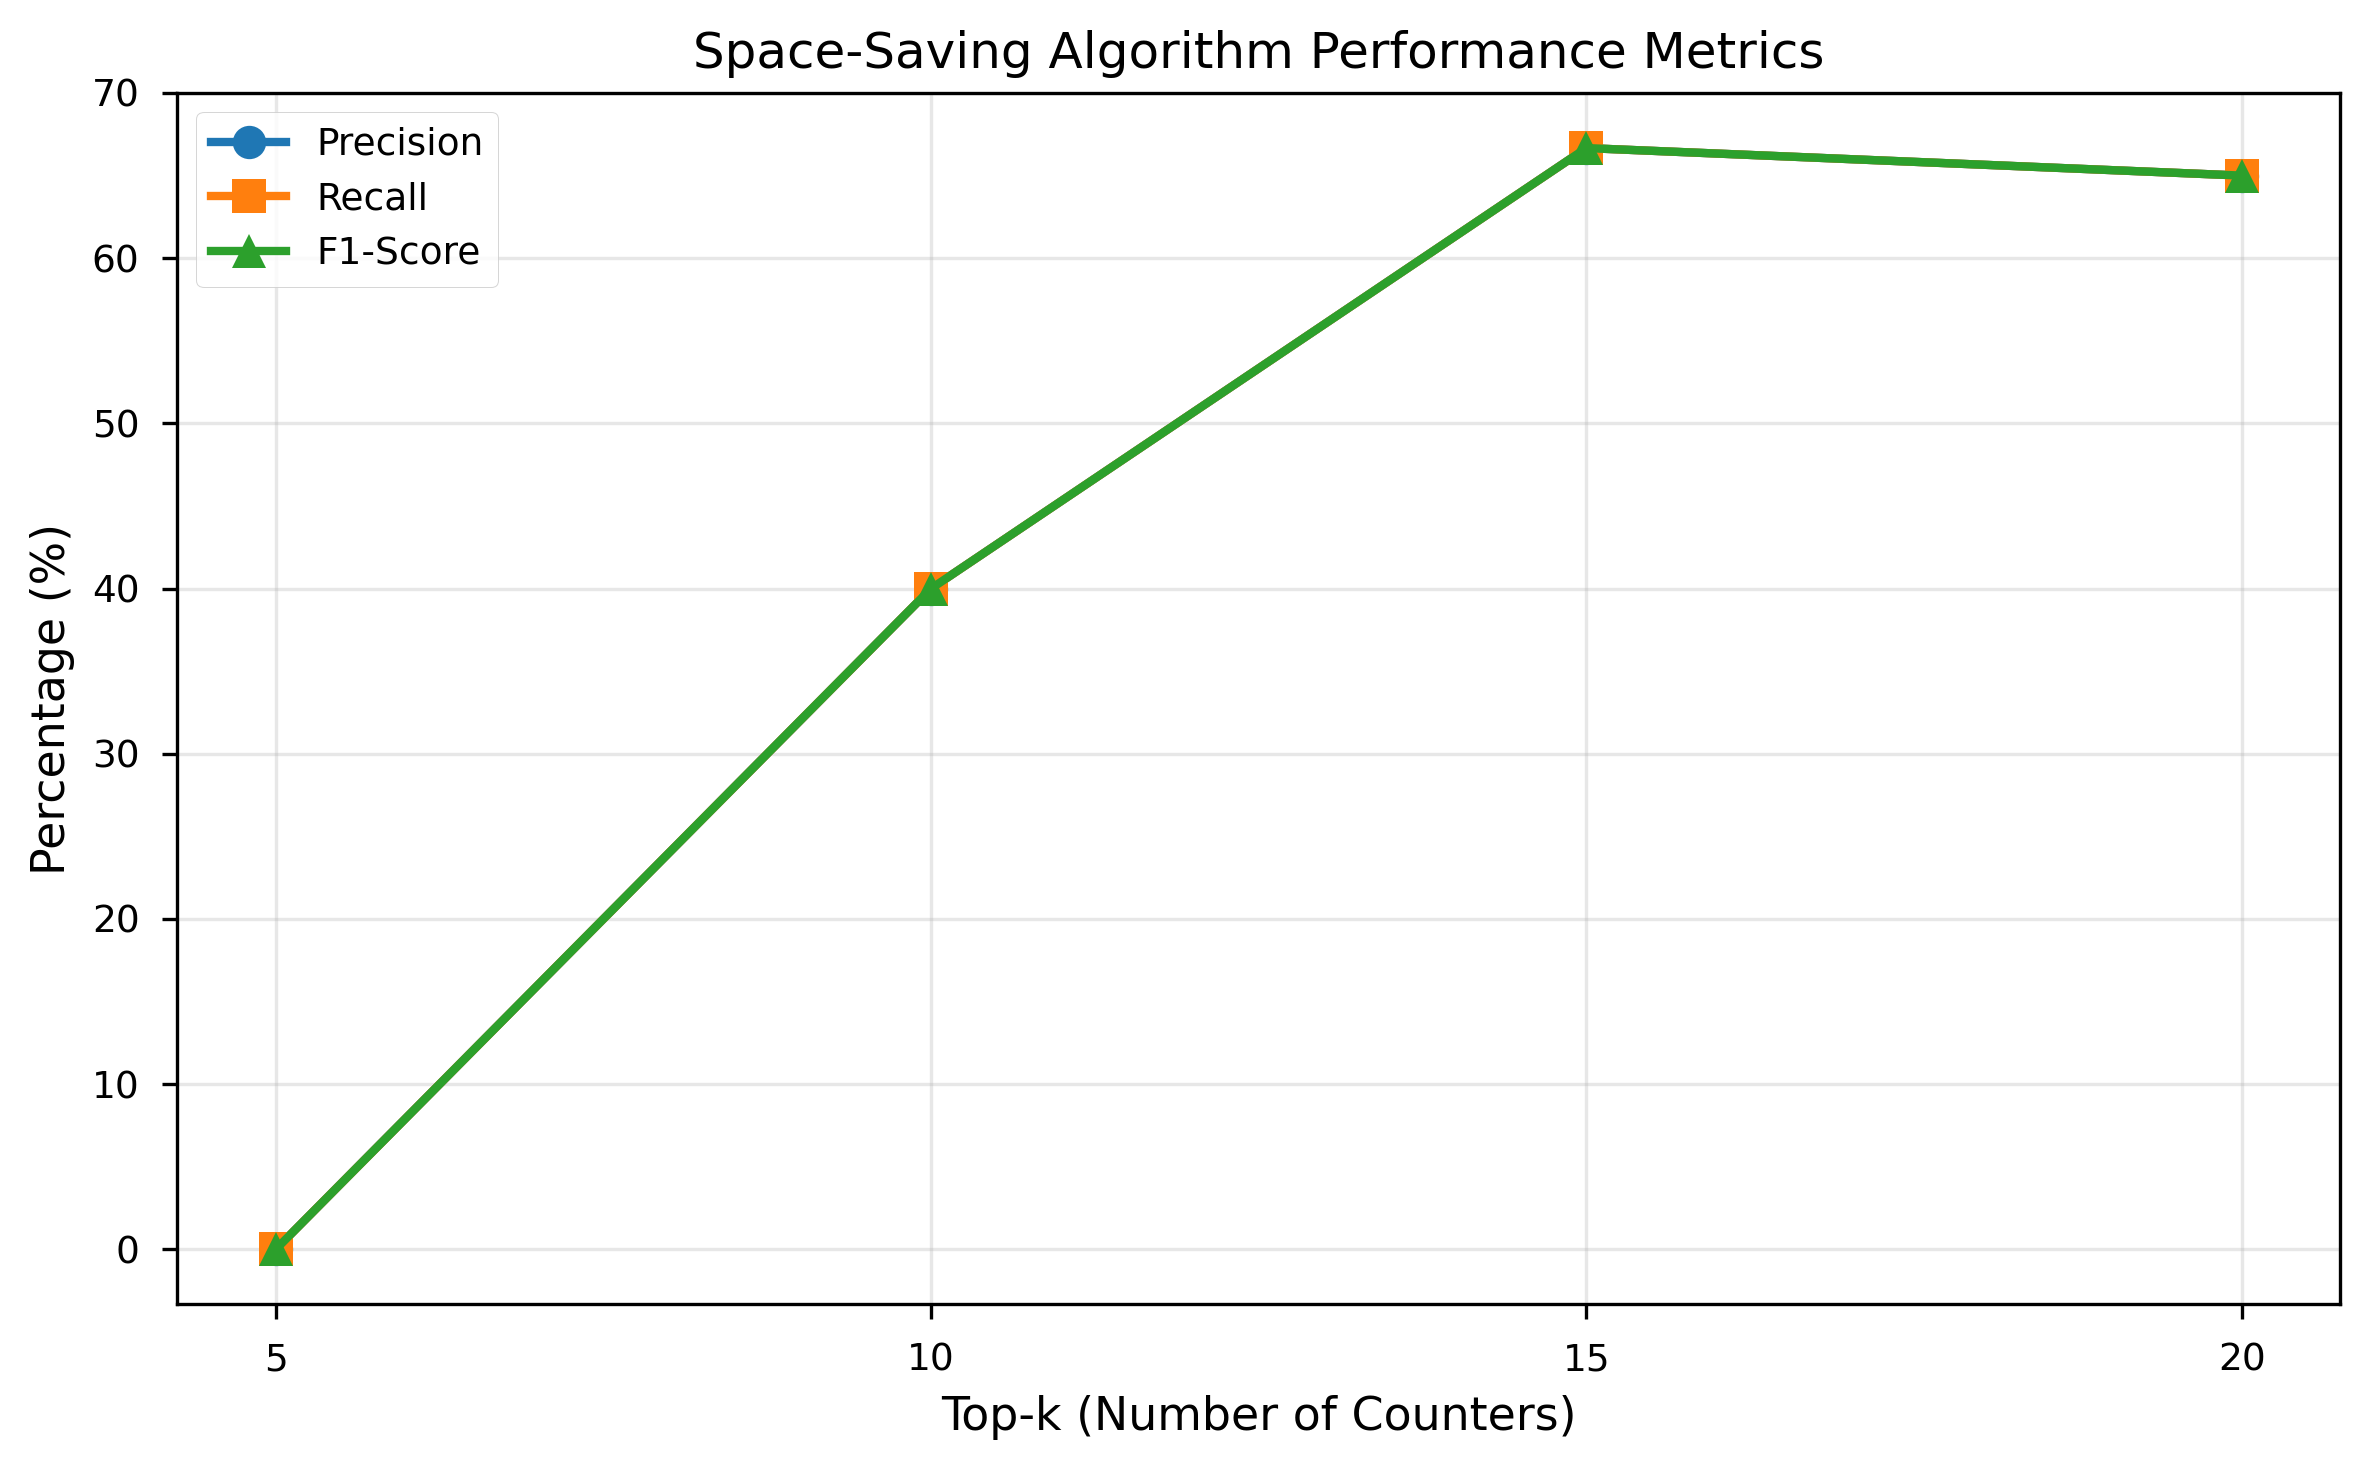

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(ss_performance['top_k'], ss_performance['precision_pct'], 
        marker='o', label='Precision', linewidth=2, markersize=8)
ax.plot(ss_performance['top_k'], ss_performance['recall_pct'], 
        marker='s', label='Recall', linewidth=2, markersize=8)
ax.plot(ss_performance['top_k'], ss_performance['f1_score_pct'], 
        marker='^', label='F1-Score', linewidth=2, markersize=8)

ax.set_xlabel('Top-k (Number of Counters)')
ax.set_ylabel('Percentage (%)')
ax.set_title('Space-Saving Algorithm Performance Metrics')
ax.set_xticks(ss_performance['top_k'])
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Algorithm Comparison (Top 10)

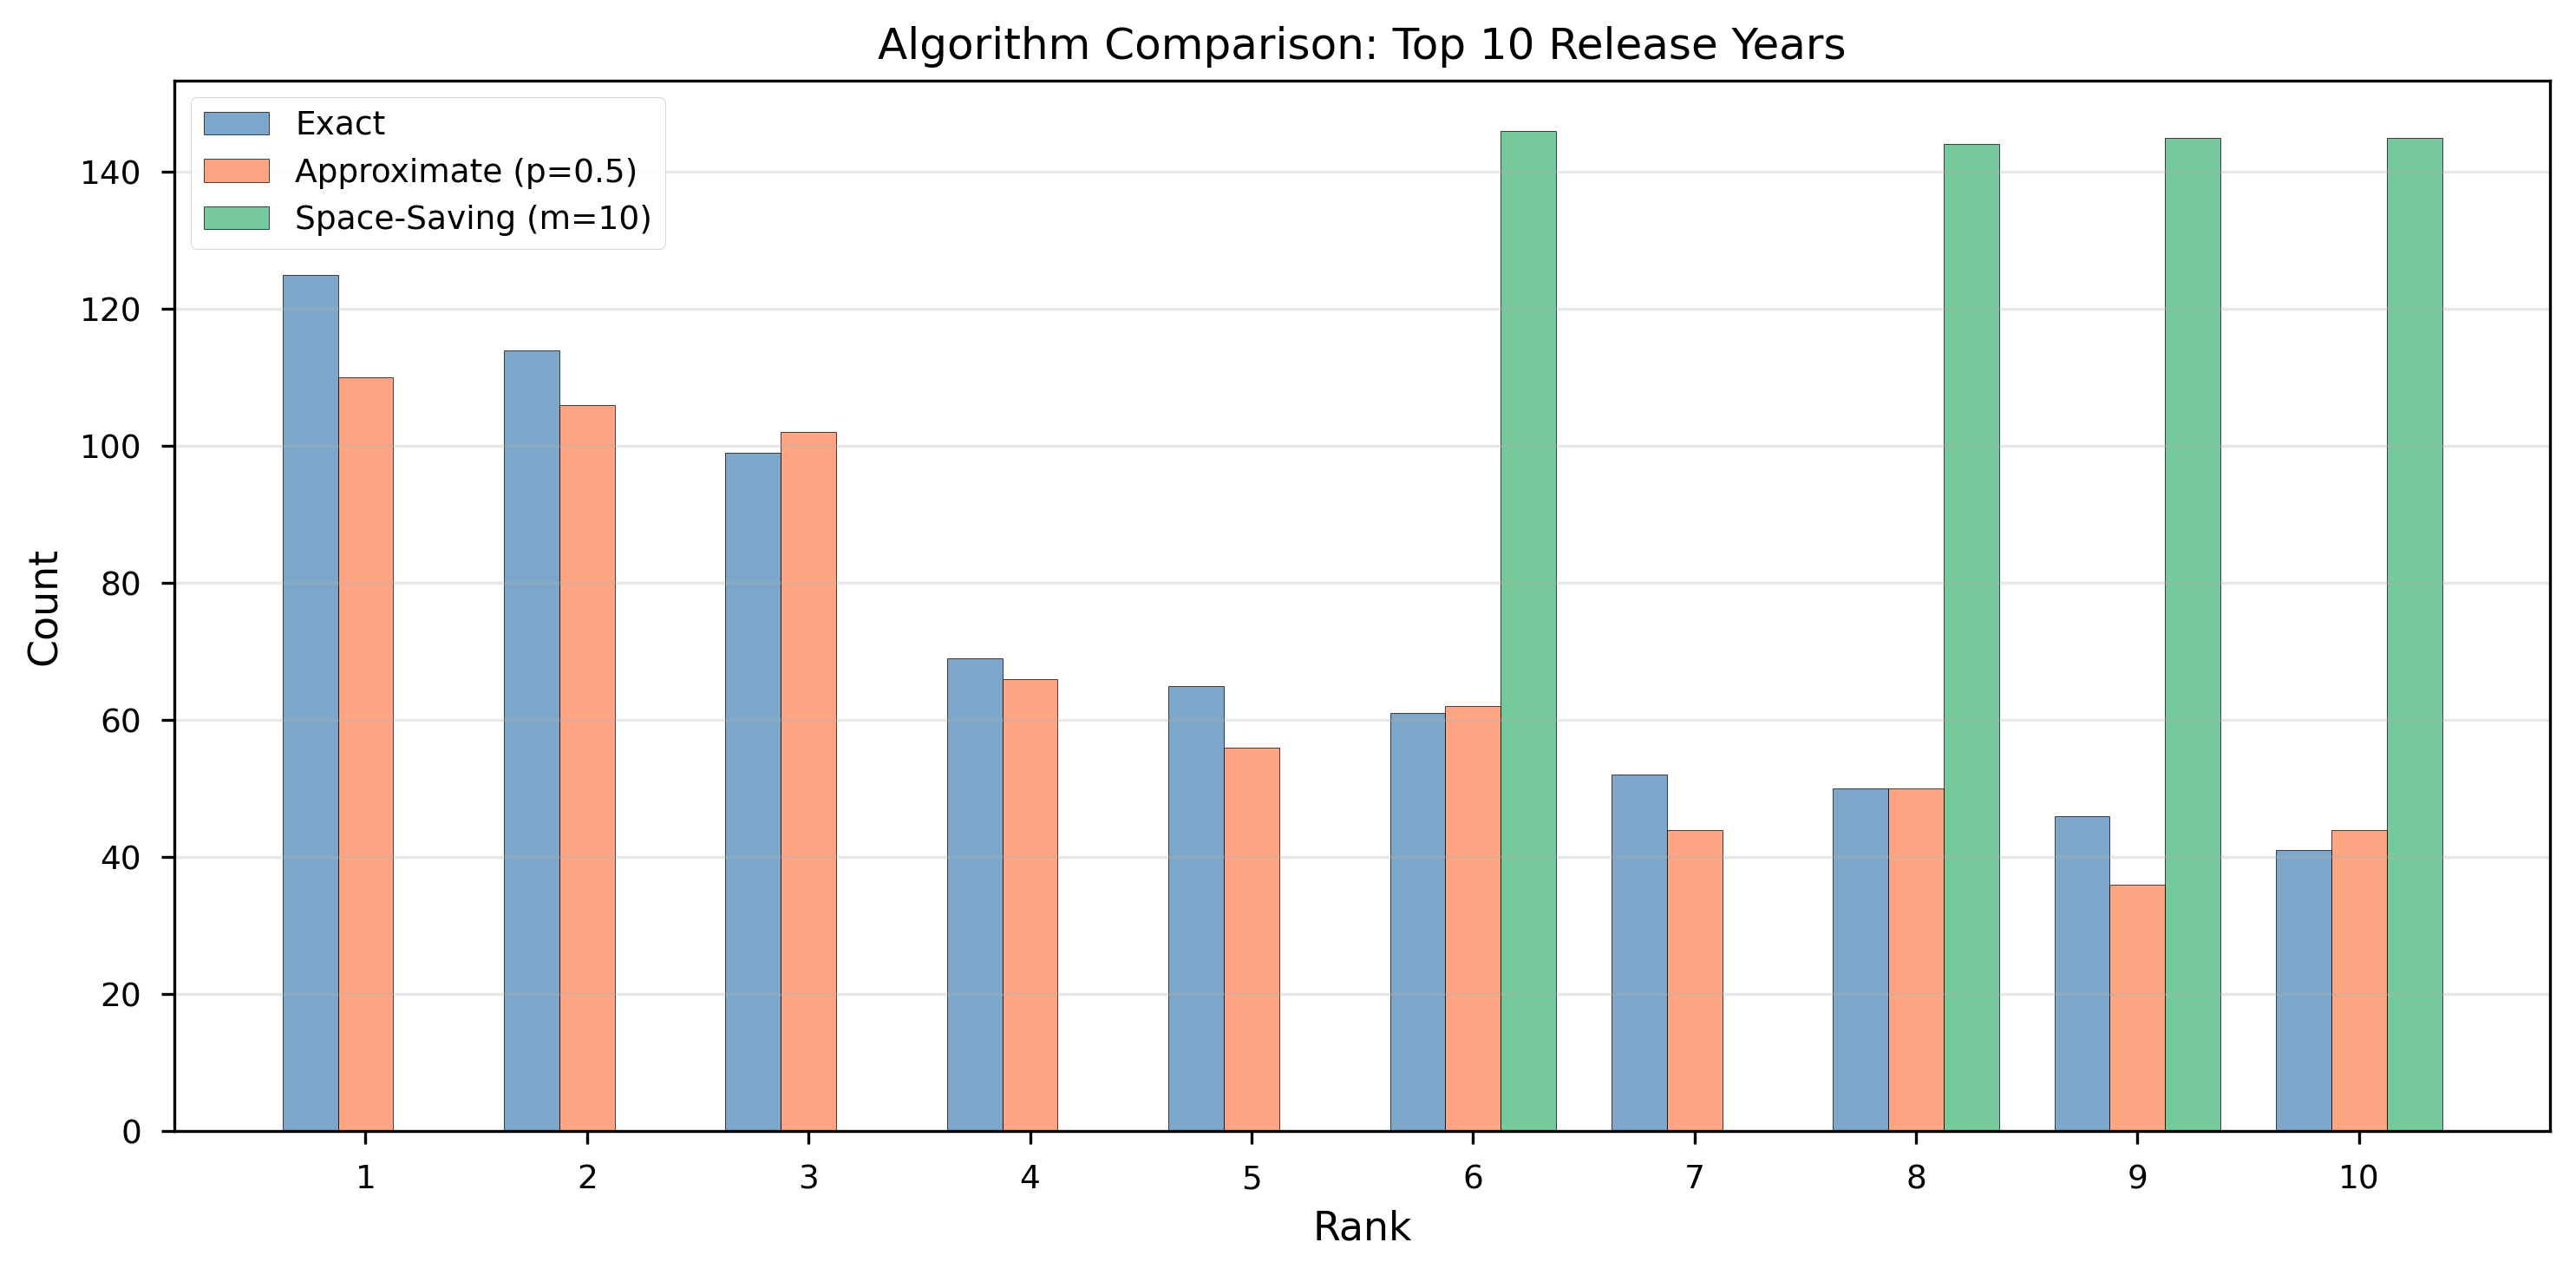

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(approx_top10))
width = 0.25

ax.bar(x - width, approx_top10['exact_count'], width, label='Exact', 
       edgecolor='black', color='steelblue', alpha=0.7)
ax.bar(x, approx_top10['approx_count'], width, label='Approximate (p=0.5)', 
       edgecolor='black', color='coral', alpha=0.7)
ax.bar(x + width, ss_top10['ss_count'], width, label='Space-Saving (m=10)', 
       edgecolor='black', color='mediumseagreen', alpha=0.7)

ax.set_xlabel('Rank')
ax.set_ylabel('Count')
ax.set_title('Algorithm Comparison: Top 10 Release Years')
ax.set_xticks(x)
ax.set_xticklabels(approx_top10['rank'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Order Preservation Analysis

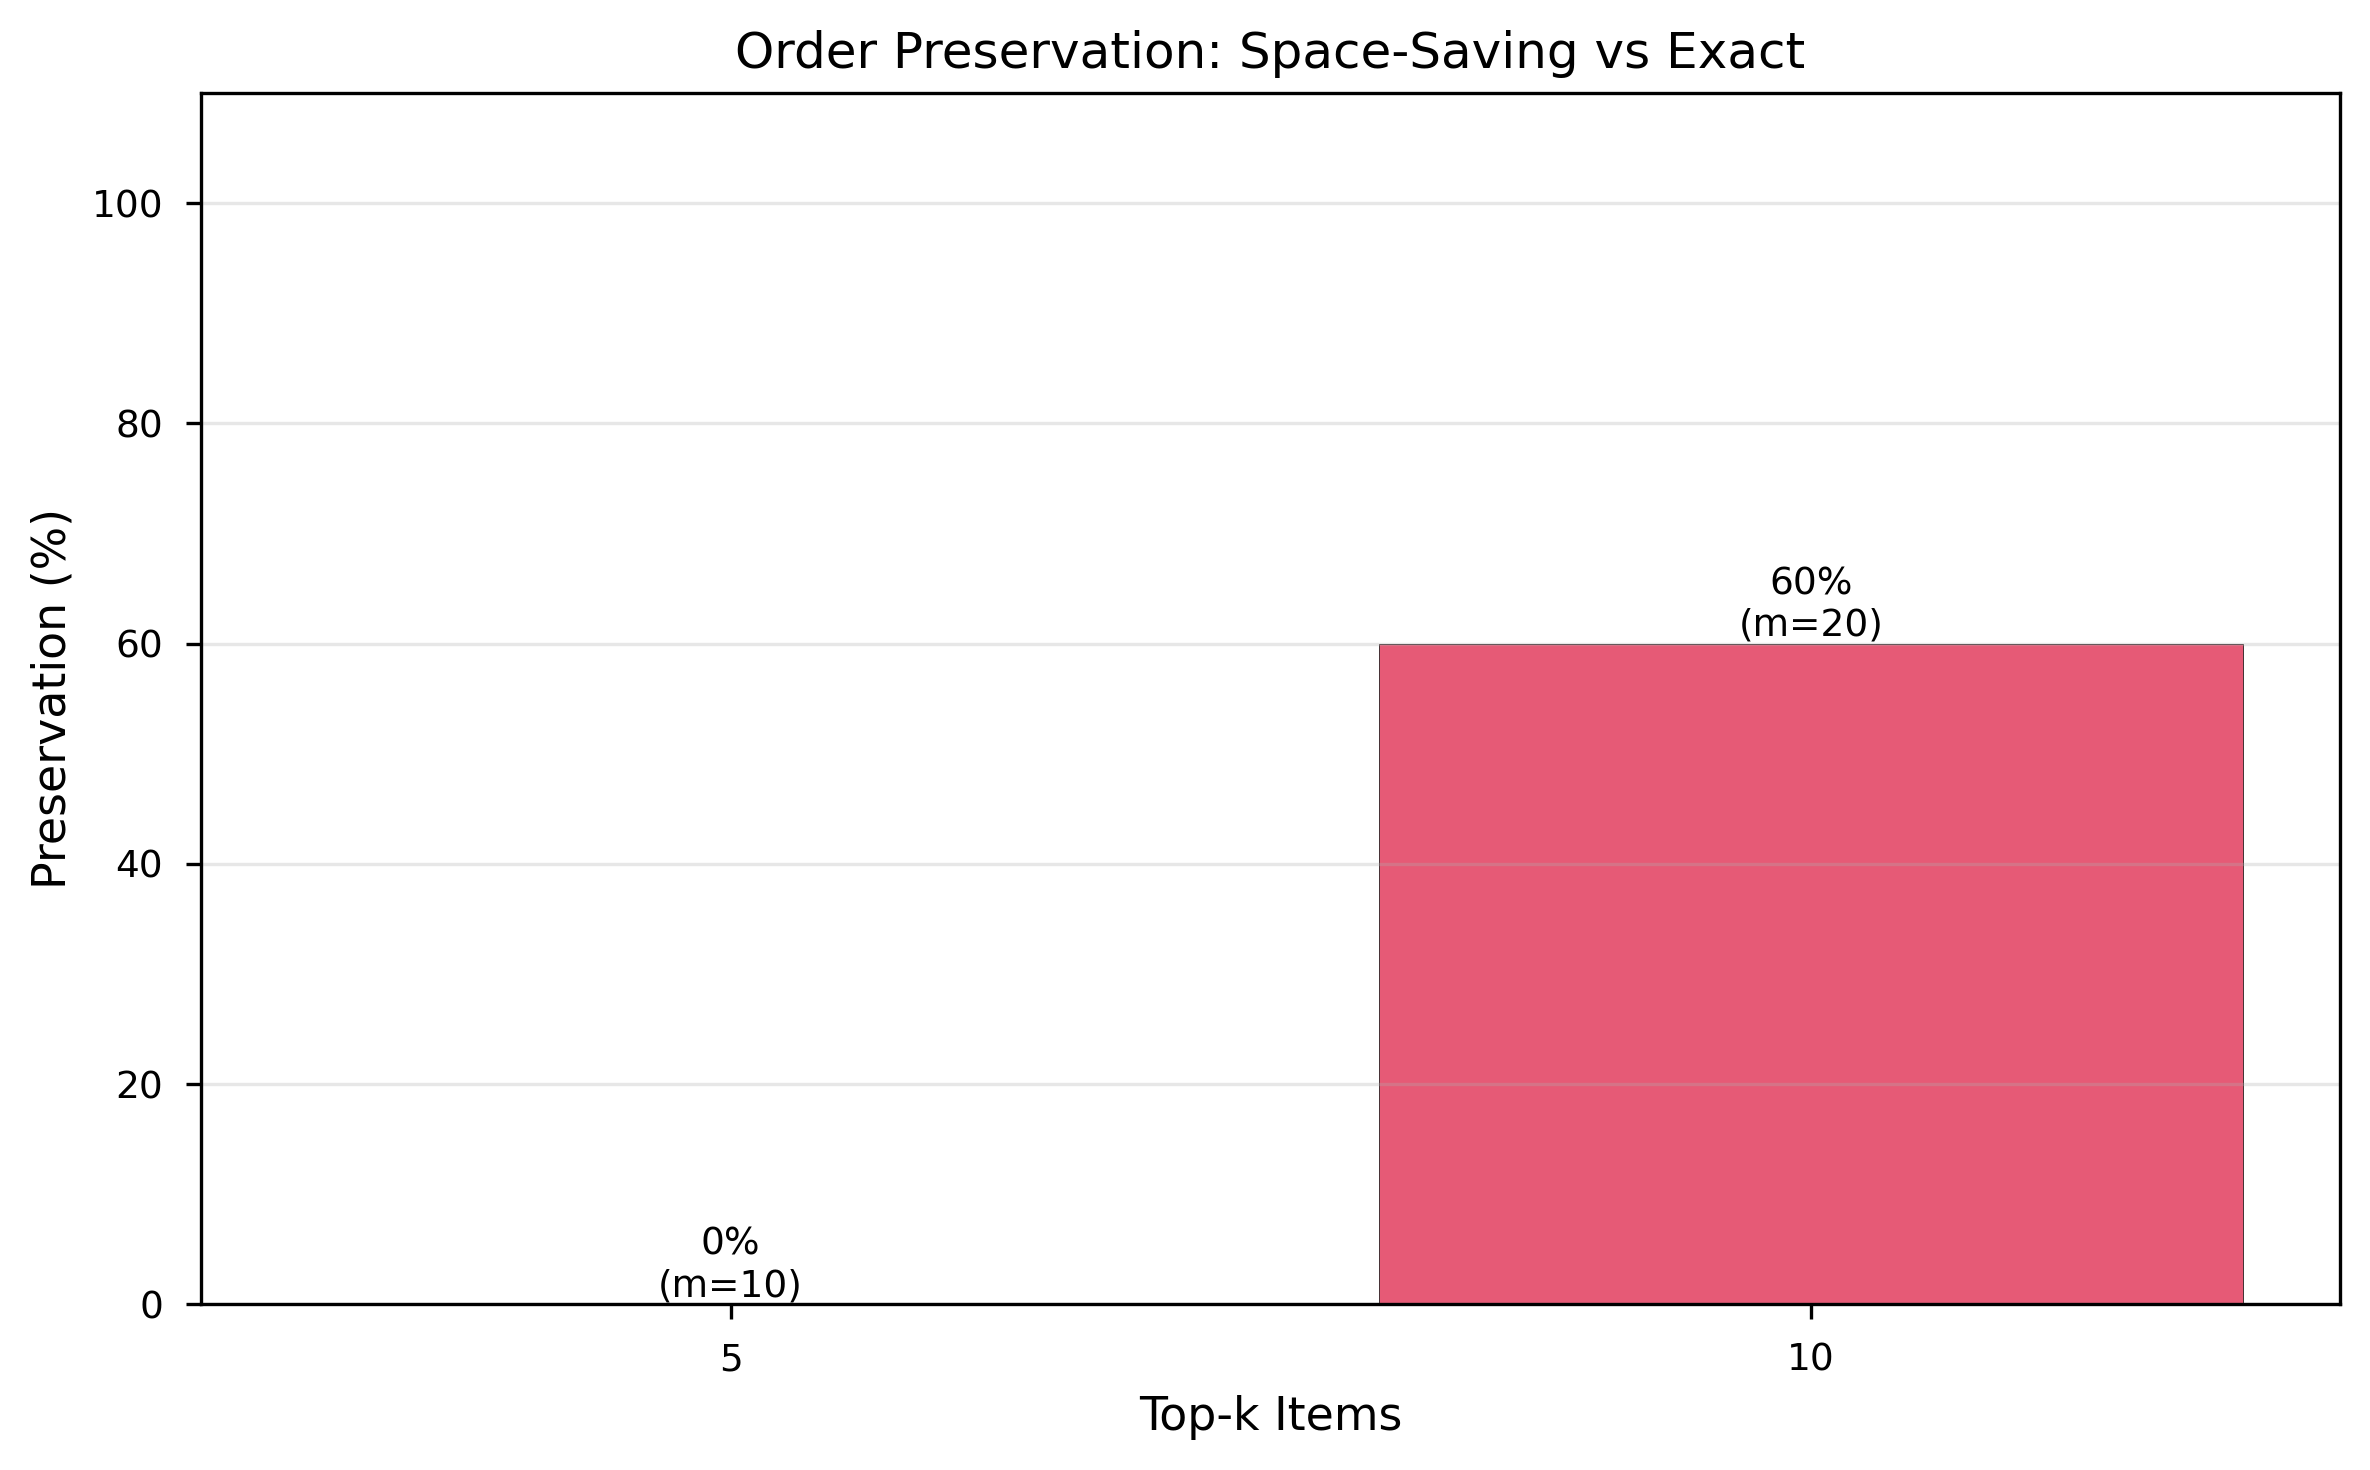

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

colors = ['crimson' if p < 100 else 'mediumseagreen' 
          for p in order_preservation['preservation_pct']]

bars = ax.bar(order_preservation['top_k'].astype(str), 
              order_preservation['preservation_pct'], 
              edgecolor='black', color=colors, alpha=0.7)

for i, (bar, count) in enumerate(zip(bars, order_preservation['num_counters'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}%\n(m={count})',
            ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Top-k Items')
ax.set_ylabel('Preservation (%)')
ax.set_title('Order Preservation: Space-Saving vs Exact')
ax.set_ylim(0, 110)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Summary: Accuracy vs Memory Trade-off

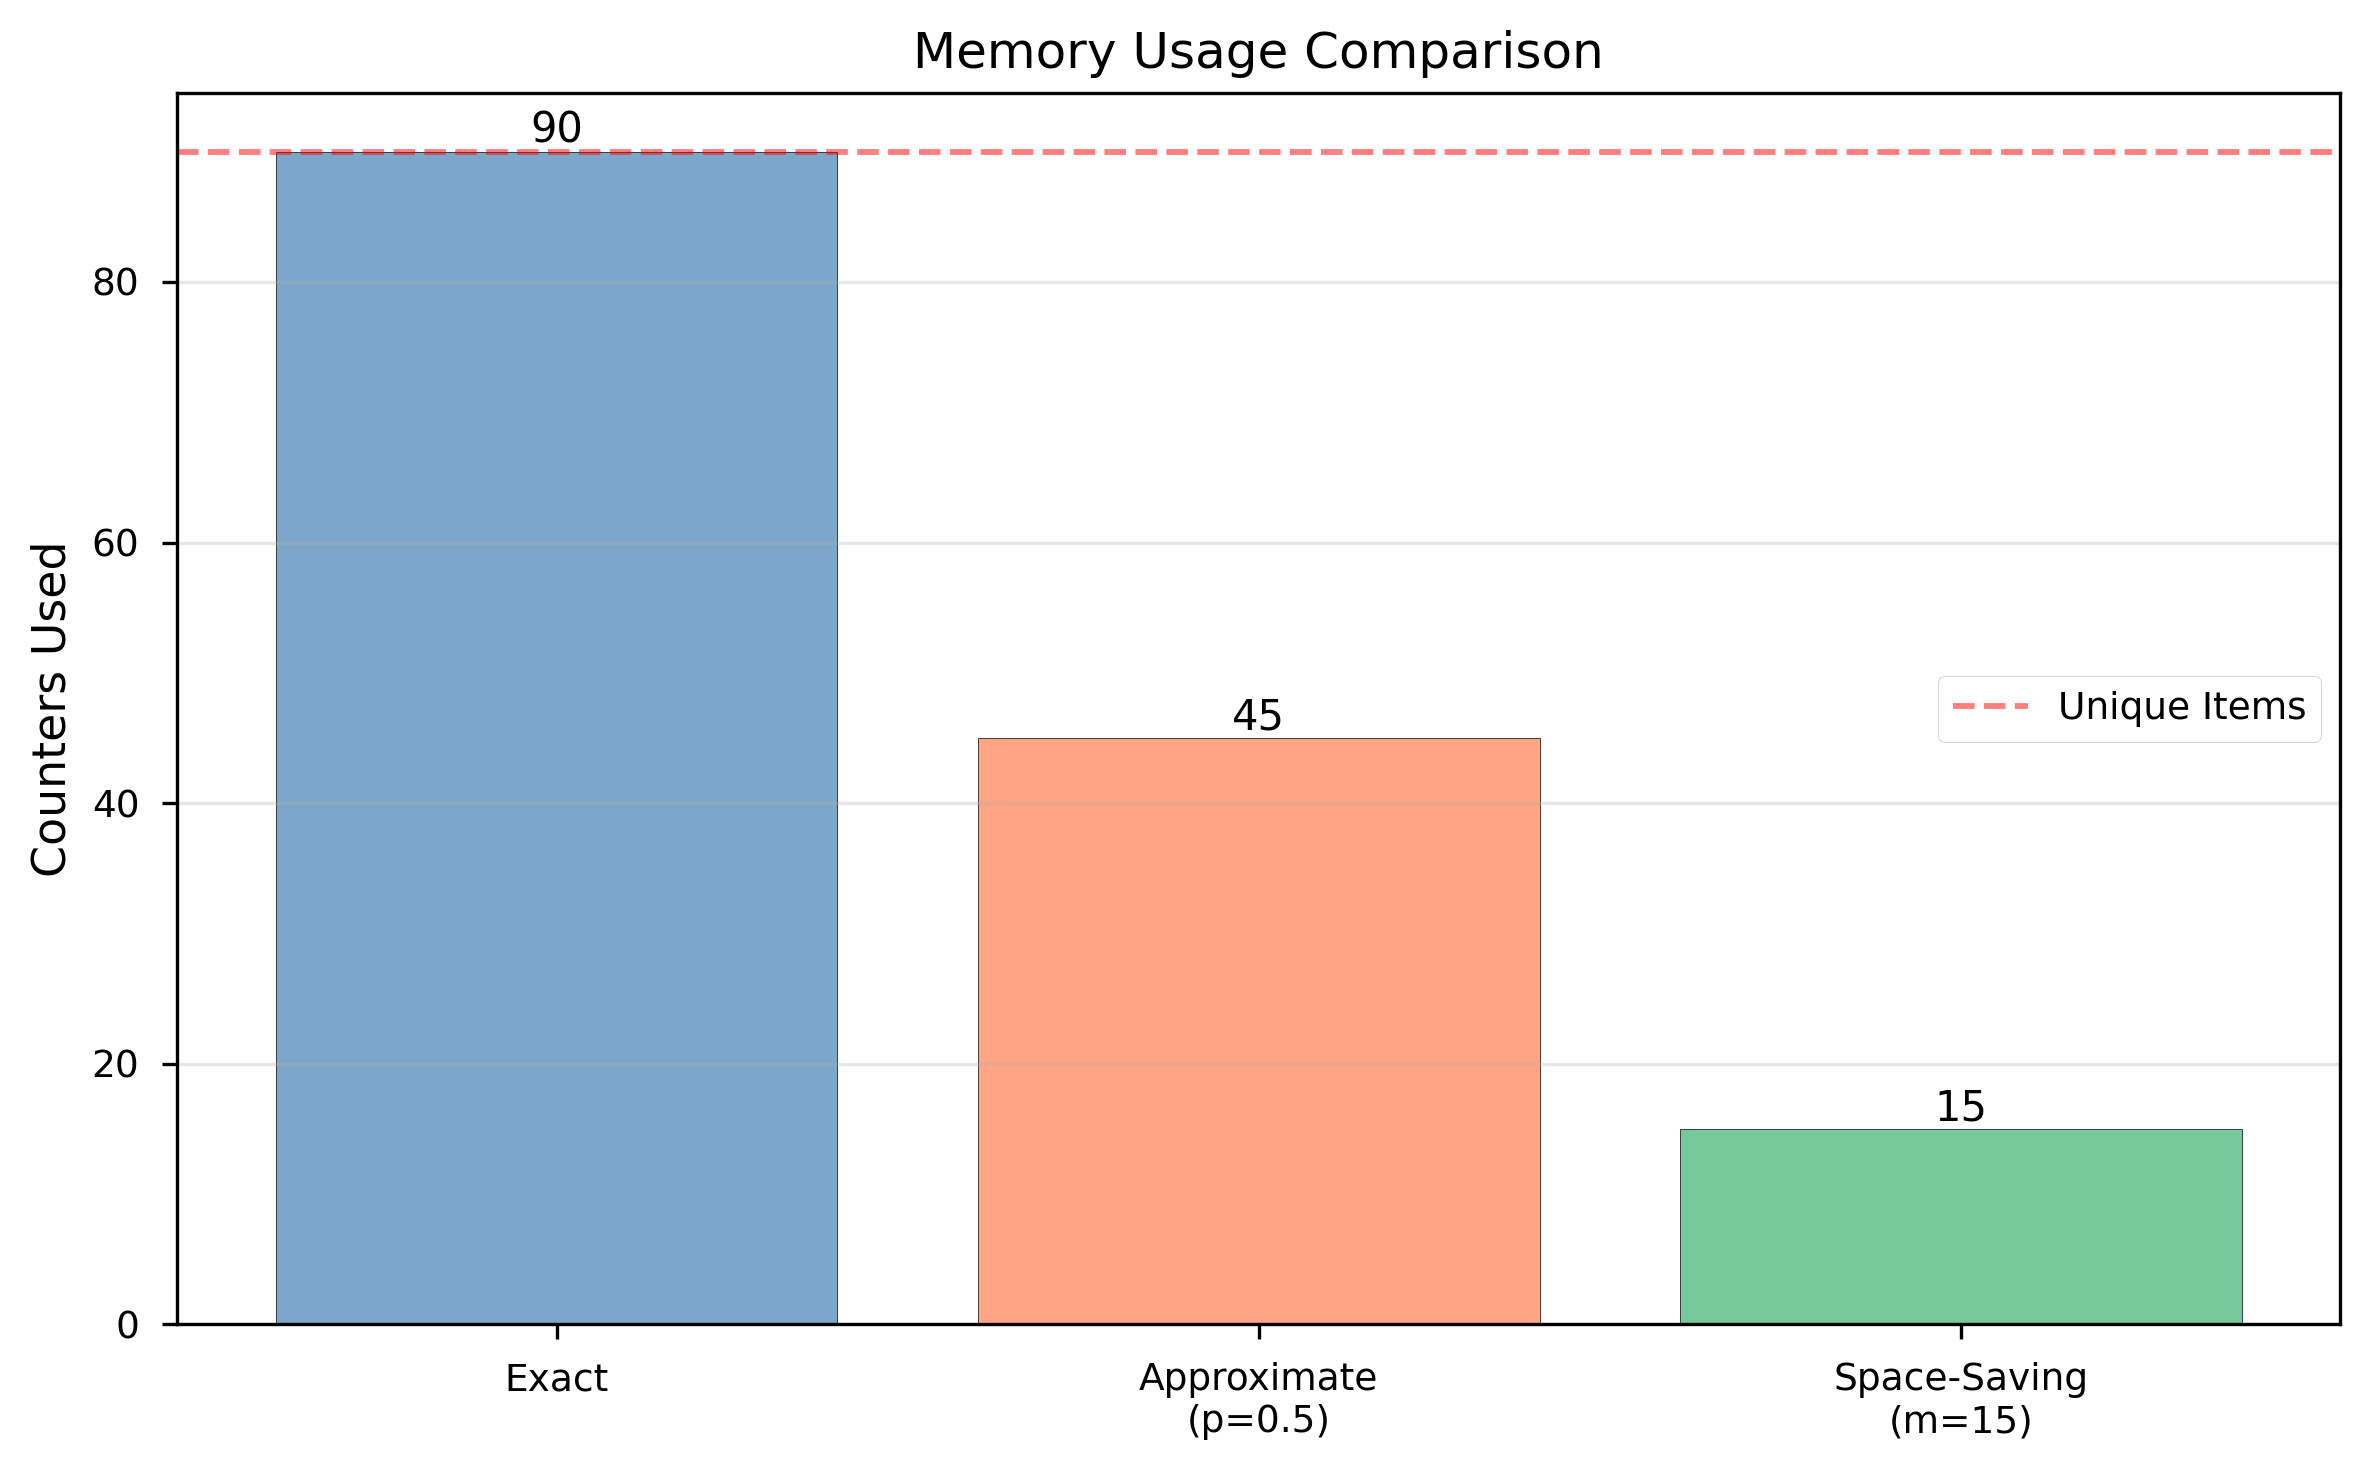

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

unique_items = len(df['release_year'].unique())
methods = ['Exact', 'Approximate\n(p=0.5)', 'Space-Saving\n(m=15)']
memory_usage = [unique_items, unique_items * 0.5, 15]

bars = ax.bar(methods, memory_usage, edgecolor='black', 
              color=['steelblue', 'coral', 'mediumseagreen'], alpha=0.7)
ax.axhline(y=unique_items, color='red', linestyle='--', alpha=0.5, label='Unique Items')
ax.set_ylabel('Counters Used')
ax.set_title('Memory Usage Comparison')
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, memory_usage):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

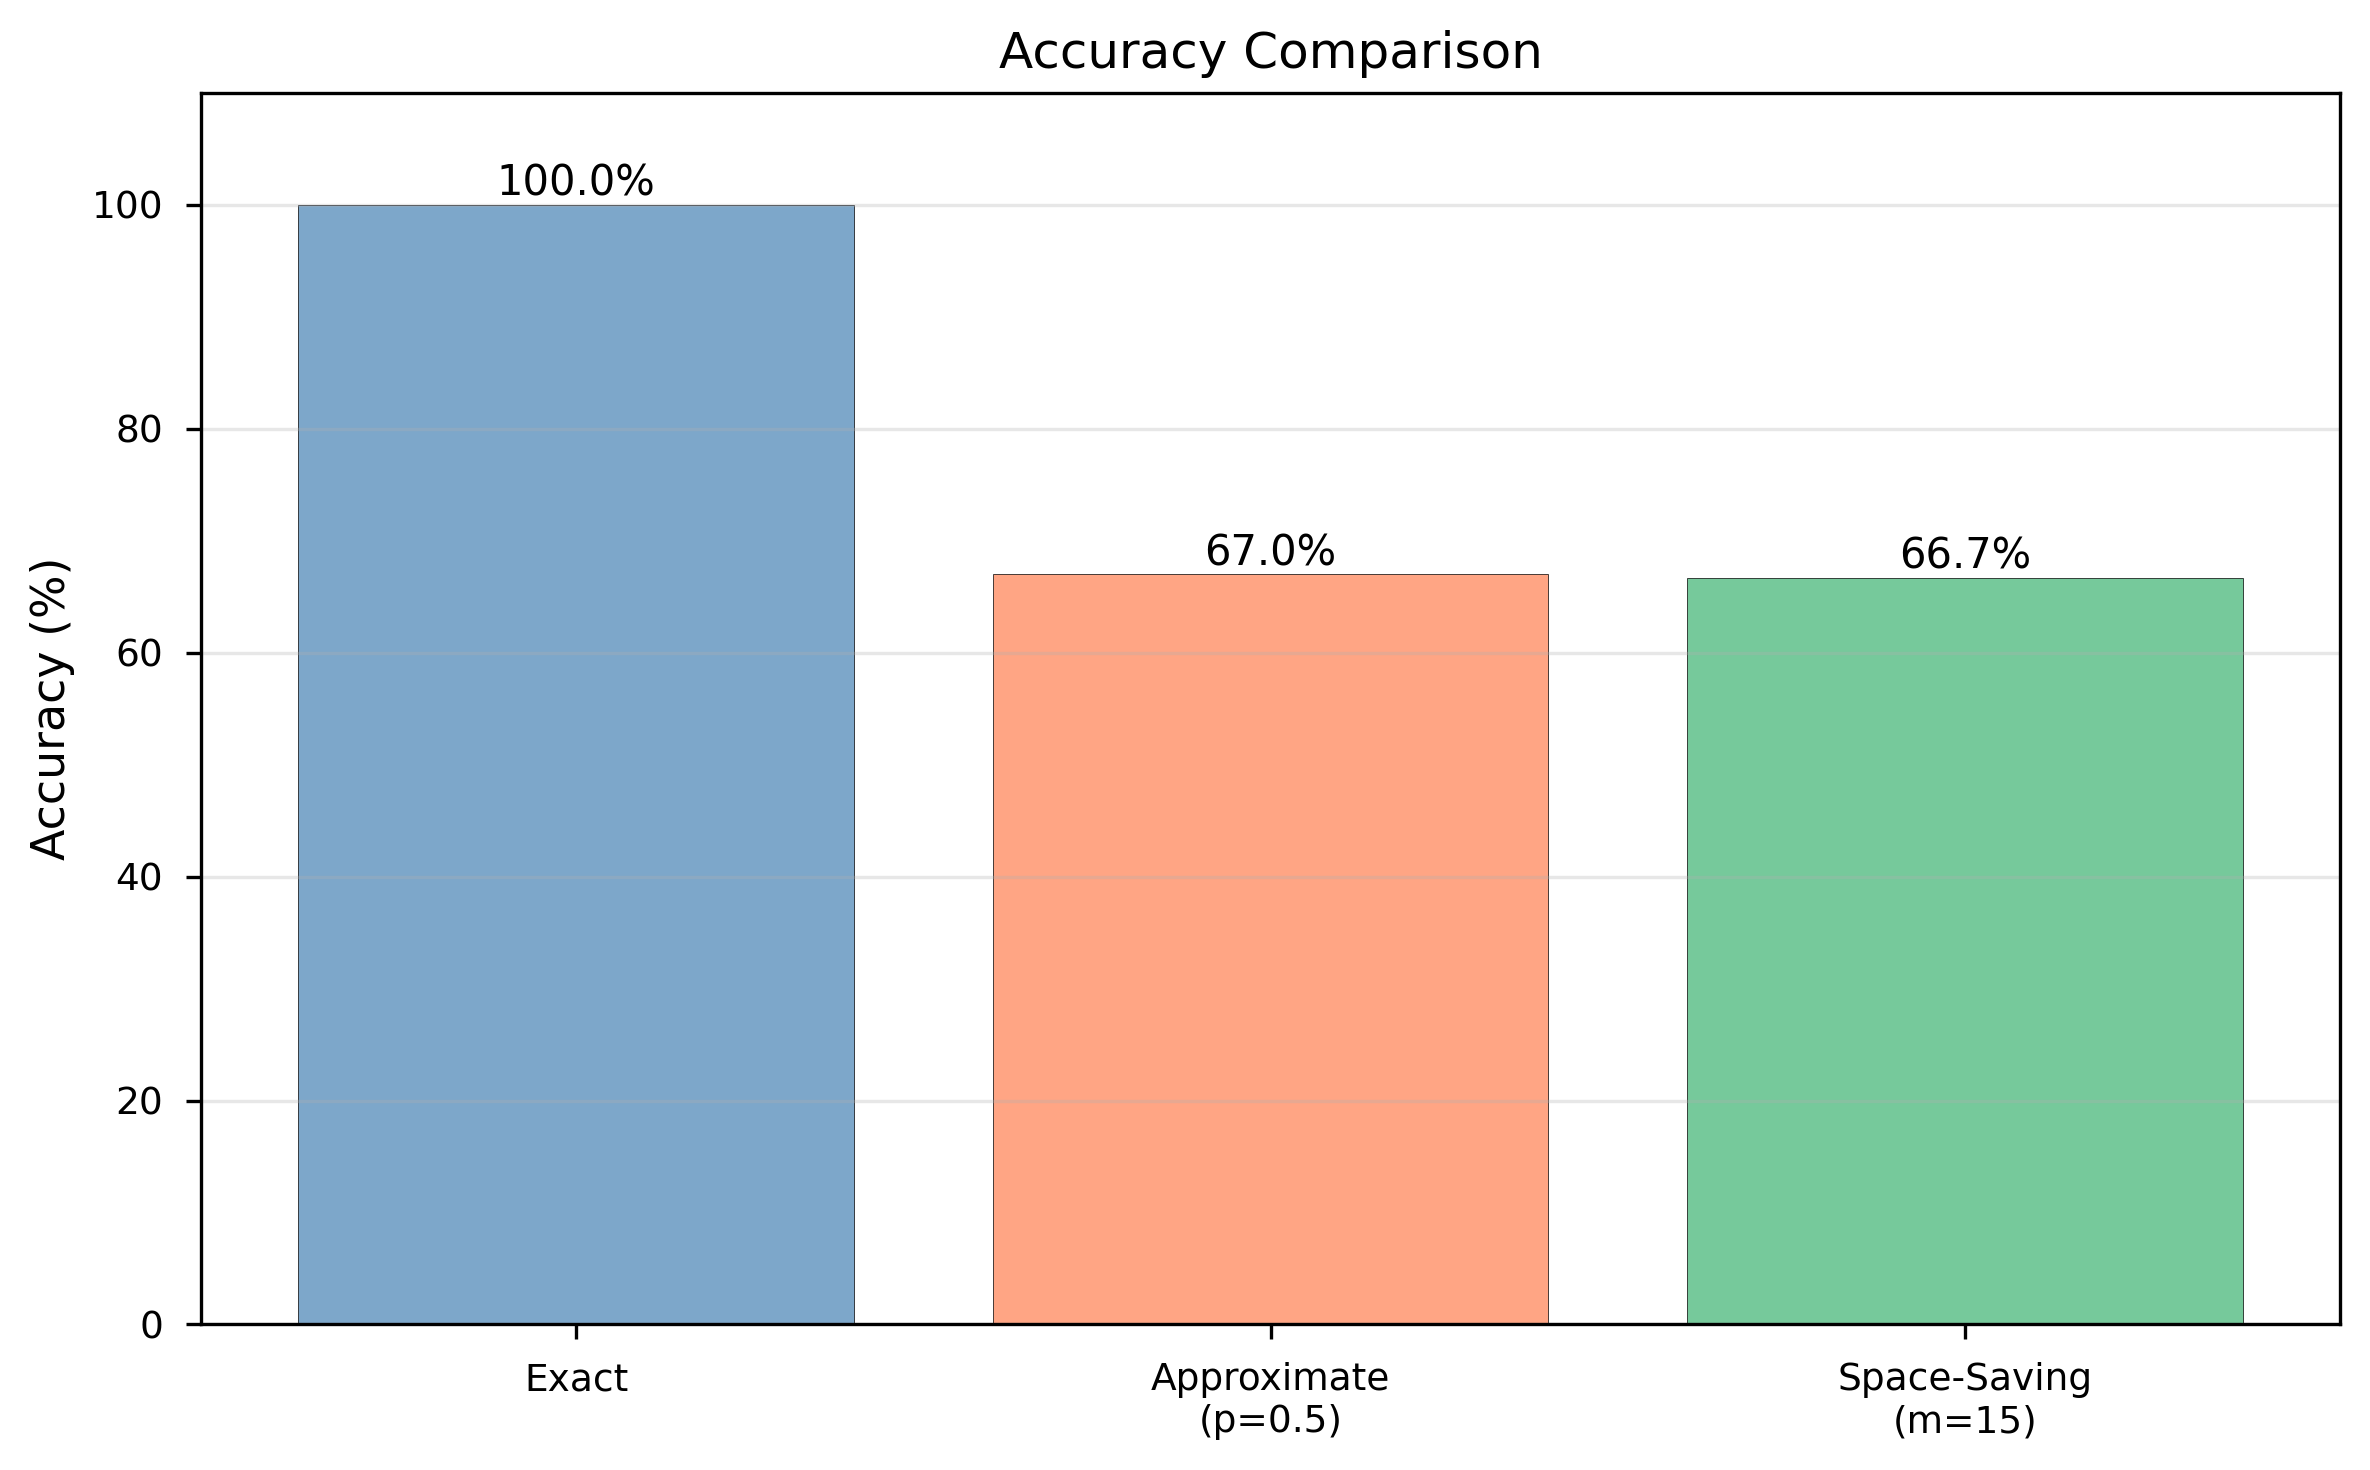

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

methods = ['Exact', 'Approximate\n(p=0.5)', 'Space-Saving\n(m=15)']
accuracy = [100, 67, 66.7]

bars = ax.bar(methods, accuracy, edgecolor='black', 
              color=['steelblue', 'coral', 'mediumseagreen'], alpha=0.7)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Comparison')
ax.set_ylim(0, 110)
ax.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, accuracy):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()